# Pandas 한번에 제대로 배우기


###Pandas 특징

---
- 부동 소수점이 아닌 데이터 뿐만 아니라 부동 소수점 데이터에서도 결측 데이터(NaN으로 표시됨)를 쉽게 처리
- 크기 변이성 : DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
- 자동 및 명시적 데이터 정렬 : 객체를 라벨 집합에 명시적으로 정렬하거나, 사용자가 라벨을 무시하고 Series, DataFrame 등의 계산에서 자동으로 데이터 조정 가능
- 데이터 세트에서 집계 및 변환을 위한 분할, 적용, 결합 작업을 수행할 수 있는 강력하고 유연한 group-by 함수 제공
- 누락된 데이터 또는 다른 Python 및 NumPy 데이터 구조에서 서로 다른 인덱싱 데이터를 DataFrame 개체로 쉽게 변환
- 대용량 데이터 세트의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집합 구하기 가능
- 직관적인 데이터 세트 병합 및 결합
- 데이터 세트의 유연한 재구성 및 피벗
- 축의 계층적 라벨링(눈금당 여러 개의 라벨을 가질 수 있음)
- 플랫 파일(CSV 및 구분), Excel 파일, 데이터베이스 로딩 및 초고속 HDF5 형식의 데이터 저장/로드에 사용되는 강력한 IO도구 제공
- 시계열 특정 기능 : 날짜 범위 생성 및 주파수 변환, 무빙 윈도우 통계, 날짜 이동 및 지연


import (library) as (단축어): pandas, numpy 등 라이브러리 사용 시 선언 필요

pandas.__version__ : 버전 확인 방법

In [2]:
import numpy as np
import pandas as pd
pd.__version__

'1.3.5'

## Pandas 객체


### Series 객체

인덱스와 값을 함께 저장해주는 객체

In [ ]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

Series 객체의 값만 출력할 때 사용하는 속성

In [ ]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Series 객체의 인덱스만 출력할 때 사용하는 속성

In [ ]:
s.index

RangeIndex(start=0, stop=5, step=1)

인덱스로 개별 접근하거나 슬라이싱 등의 동작 가능

In [ ]:
s[1]

0.25

In [ ]:
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

인덱스를 숫자, 문자 등 원하는대로 지정할 수도 있고 연속된 값이 아니어도 됨

지정한 인덱스로 개별 접근, 슬라이싱 가능

In [ ]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

Series 객체 안에 존재 유무를 확인할 수 있음

In [ ]:
'b' in s

True

유일한 값만 출력할 수 있음

In [ ]:
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

값과 갯수를 계산해 출력할 수 있음

In [ ]:
s.value_counts()

0.00    1
0.25    1
0.50    1
0.75    1
1.00    1
dtype: int64

값의 위치를 boolean으로 반환

In [ ]:
s.isin([0.25, 0.75])

a    False
b     True
c    False
d     True
e    False
dtype: bool

한글, 튜플도 동일하게 사용 가능

In [ ]:
pop_tuple = {'서울특별시' : 9720846,
             '부산광역시' : 3404423,
             '인천광역시' : 2947217,
             '대구광역시' : 2427954,
             '대전광역시' : 1471040,
             '광주광역시' : 1455048}
population = pd.Series(pop_tuple)
population

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
dtype: int64

In [ ]:
population['서울특별시']

9720846

In [ ]:
population['서울특별시':'인천광역시']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
dtype: int64

### DataFrame 객체

Series 객체는 단일한 형태의 객체를 가지지만 DataFrame은 여러 Column이 들어간 2차원 형태의 객체를 가짐

In [ ]:
pd.DataFrame([{'A':2, 'B':4, 'D':3}, {'A':4, 'B':5, 'C':7}])

,A,B,D,C
0,2,4,3.0,NaN
1,4,5,NaN,7.0


columns, index를 통해 원하는 형태로 지정 가능

In [ ]:
pd.DataFrame(np.random.rand(5,5),
             columns=['A','B','C','D','E'],
             index=[1,2,3,4,5])

,A,B,C,D,E
1,0.951615,0.809111,0.441932,0.466524,0.478302
2,0.463477,0.102264,0.523577,0.072237,0.698532
3,0.632154,0.964310,0.161747,0.881442,0.188816
4,0.774464,0.728028,0.236570,0.495887,0.086239
5,0.225605,0.570898,0.551915,0.825813,0.039068


In [ ]:
male_tuple = {'서울특별시' : 4732275,
              '부산광역시' : 1668618,
              '인천광역시' : 1476813,
              '대구광역시' : 1198815,
              '대전광역시' : 734441,
              '광주광역시' : 720060}
male = pd.Series(male_tuple)
male

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
dtype: int64

In [ ]:
female_tuple = {'서울특별시' : 4988571,
             '부산광역시' : 1735805,
             '인천광역시' : 1470404,
             '대구광역시' : 1229139,
             '대전광역시' : 736599,
             '광주광역시' : 734988}
female = pd.Series(female_tuple)
female

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
dtype: int64

각각의 Series객체를 DataFrame으로 한번에 출력할 수 있음

In [ ]:
korea_df = pd.DataFrame({'인구수' : population,
                         '남자인구수' : male,
                         '여자인구수': female})

korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599
광주광역시,1455048,720060,734988


index와 column만 각각 출력할 수 있음

In [ ]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시'], dtype='object')

In [ ]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

DataFrame에서도 인덱싱, 슬라이싱 동일하게 가능

In [ ]:
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [ ]:
korea_df['서울특별시':'인천광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404


### Index 객체

|클래스|설명|
|--|--|
|Index|일반적인  Index 객체로 NumPy배열 형식으로 축의 이름 표현|
|Int64Index|정수 값을 위한 Index|
|MultiIndex|단일 축에 여러 단계 색인을 표현하는 계층적 Index 객체(튜플의 배열과 유사)|
|DateTimeIndex|NumPy의 datetime64 타입으로 스탬프 저장|
|PeriodIndex|기간 데이터를 위한 Index|

인덱싱, 슬라이싱 가능

In [ ]:
idx = pd.Index([2, 4, 6, 8, 10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [ ]:
idx[1]

4

In [ ]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [ ]:
idx[-1::]

Int64Index([10], dtype='int64')

In [ ]:
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

size : 크기를 나타내는 속성

shape : 차원을 나타내는 속성

ndim : 차원을 나타내는 속성

dtype : 데이터의 형을 나타내는 속성

In [ ]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

|연산자|메소드|설명|
|--|--|--|
||append|색인 객체를 추가한 새로운 색인 반환|
||difference|색인의 차집합 반환|
|&|intersection|색인의 교집합 반환|
|\||union|색인의 합집합 반환|
||isin|색인이 존재하는지 여부를 불리언 배열로 반환|
||delete|색인이 삭제된 새로운 색인 반환|
||drop|값이 삭제된 새로운 색인 반환|
||insert|색인이 추가된 새로운 색인 반환|
||is_monotonic|색인이 단조성을 가지면 True값 반환|
||is_unique|중복되는 색인이 없다면 True값 반환|
||unique|색인에서 중복되는 요소를 제거하고 유일한 값만 반환|


In [ ]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])
print(idx1.append(idx2))
print(idx1.difference(idx2))
print(idx1 - idx2)
print(idx1.intersection(idx2))
print(idx1 & idx2)
print(idx1.union(idx2))
print(idx1 | idx2)
print(idx1.delete(0))
print(idx1.drop(1))
print(idx1 ^ idx2) # 여집합

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')


<ipython-input-30-80f22bdf6b6f>:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  print(idx1 & idx2)
<ipython-input-30-80f22bdf6b6f>:9: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  print(idx1 | idx2)
<ipython-input-30-80f22bdf6b6f>:12: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  print(idx1 ^ idx2) # 여집합




---



## 인덱싱(Indexing)

In [ ]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [ ]:
s['b']

0.25

In [ ]:
'b' in s

True

In [ ]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

.items()는 zip형태로 출력되므로 list()로 감싸서 보기 편하게 출력할 수 있음

In [ ]:
s.items()

In [ ]:
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [ ]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [ ]:
s['a':'d']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [ ]:
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

필터링을 할 수 있음

In [ ]:
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

### Series 인덱싱

In [ ]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
              index=[1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [ ]:
s[1]

'a'

In [ ]:
s[2:4]

5    c
7    d
dtype: object

인덱스가 아닌 정수값 0부터 데이터와 매핑됨. iloc[1]은 2번째이므로 2번째 값 b 반환

In [ ]:
s.iloc[1]

'b'

In [ ]:
s.iloc[2:4]

5    c
7    d
dtype: object

인덱스를 새로 지정하는 메서드

In [ ]:
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

method='bfill'(back fill) : 뒤의 값으로 앞의 빈자리를 채우는 속성

In [ ]:
s.reindex(range(10), method='bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱

|사용 방법|설명|
|--|--|
|df[val]|하나의 컬럼 또는 여러 컬럼 선택|
|df.loc[val]|라벨값으로 로우의 부분집합 선택|
|df.loc[:, val]|라벨값으로 컬럼의 부분집합 선택|
|df.loc[val1, val2]|라벨값으로 로우와 컬럼의 부분집합 선택|
|df.iloc[where]|정수 색인으로 로우의 부분집합 선택|
|df.iloc[:, where]|정수 색인으로 컬럼의 부분집합 선택|
|df.iloc[where_i, where_j]|정수 색인으로 로우와 컬럼의 부분집합 선택|
|df.at[label_i, label_j]|로우와 컬럼의 라벨로 단일 값 선택|
|df.iat[i, j]|로우와 컬럼의 정수 색인으로 단일 값 선택|
|reindex|하나 이상의 축을 새로운 색인으로 재색인|
|get_value, set_value|로우와 컬럼의 이름으로 값 선택|

In [ ]:
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599
광주광역시,1455048,720060,734988


In [ ]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

대괄호 없이도 접근 가능

In [ ]:
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

컬럼 추가 가능

In [ ]:
korea_df['남여비율'] = (korea_df['남자인구수'] * 100 / korea_df['여자인구수'])

In [ ]:
korea_df.남여비율

서울특별시     94.862336
부산광역시     96.129346
인천광역시    100.435867
대구광역시     97.532907
대전광역시     99.707032
광주광역시     97.968946
Name: 남여비율, dtype: float64

값만 가져올 수 있음

In [ ]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01],
       [1.45504800e+06, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

기존의 행, 열을 바꿔서 출력

In [ ]:
korea_df.T

,서울특별시,부산광역시,인천광역시,대구광역시,대전광역시,광주광역시
인구수,9.720846e+06,3.404423e+06,2.947217e+06,2.427954e+06,1.471040e+06,1.455048e+06
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,7.344410e+05,7.200600e+05
여자인구수,4.988571e+06,1.735805e+06,1.470404e+06,1.229139e+06,7.365990e+05,7.349880e+05
남여비율,9.486234e+01,9.612935e+01,1.004359e+02,9.753291e+01,9.970703e+01,9.796895e+01


In [ ]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [ ]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
Name: 인구수, dtype: int64

In [ ]:
korea_df.loc[:'인천광역시', :'남자인구수']

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


In [ ]:
korea_df.loc[(korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [ ]:
korea_df.loc[(korea_df.인구수 < 2000000)]

,인구수,남자인구수,여자인구수,남여비율
대전광역시,1471040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [ ]:
korea_df.loc[(korea_df.인구수 > 2500000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867


In [ ]:
korea_df.loc[korea_df.남여비율 > 100]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [ ]:
korea_df.loc[(korea_df.인구수 > 2500000) & (korea_df.남여비율 > 100)]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [ ]:
korea_df.iloc[:3, :2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [ ]:
idx_tuples = [('서울특별시', 2010), ('서울특별시', 2020),
              ('부산광역시', 2010), ('부산광역시', 2020),
              ('인천광역시', 2010), ('인천광역시', 2020),
              ('대구광역시', 2010), ('대구광역시', 2020),
              ('대전광역시', 2010), ('대전광역시', 2020),
              ('광주광역시', 2010), ('광주광역시', 2020)]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [ ]:
pop_tuples = [10312545, 9720846,
               2567910, 3404423,
               2758296, 2947217,
               2511676, 2427954,
               1503664, 1471040,
               1454636, 1455048]
population = pd.Series(pop_tuples, index=idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2947217
(대구광역시, 2010)     2511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [ ]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [ ]:
population = population.reindex(midx)
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [ ]:
population[:, 2010]

서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [ ]:
population['대전광역시', :]

2010    1503664
2020    1471040
dtype: int64

unstack() : 다중인덱스 Series 객체를 DataFrame으로 변환하는 메서드

In [ ]:
korea_mdf = population.unstack()
korea_mdf

,2010,2020
광주광역시,1454636,1455048
대구광역시,2511676,2427954
대전광역시,1503664,1471040
부산광역시,2567910,3404423
서울특별시,10312545,9720846
인천광역시,2758296,2947217


stack() : DataFrame을 다중인덱스 Series 객체로 변환하는 메서드

In [ ]:
korea_mdf.stack()

광주광역시  2010     1454636
       2020     1455048
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     2567910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [ ]:
male_tuples = [5111259, 4732275,
              1773170, 1668618,
              1390356, 1476813,
              1255245, 1198815,
              753648, 734441,
              721780, 720060]
male_tuples

[5111259,
 4732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 734441,
 721780,
 720060]

In [ ]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수': male_tuples})
korea_mdf

총인구수    남자인구수
서울특별시 2010  10312545  5111259
      2020   9720846  4732275
부산광역시 2010   2567910  1773170
      2020   3404423  1668618
인천광역시 2010   2758296  1390356
      2020   2947217  1476813
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
광주광역시 2010   1454636   721780
      2020   1455048   720060

In [ ]:
female_tuples = [5201286, 4988571,
                 1794740, 1735805,
                 1367940, 1470404,
                 1256431, 1229139,
                 750016, 736599,
                 732856, 734988]
female_tuples

[5201286,
 4988571,
 1794740,
 1735805,
 1367940,
 1470404,
 1256431,
 1229139,
 750016,
 736599,
 732856,
 734988]

In [ ]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수': male_tuples,
                          '여자인구수': female_tuples})

korea_mdf

총인구수    남자인구수    여자인구수
서울특별시 2010  10312545  5111259  5201286
      2020   9720846  4732275  4988571
부산광역시 2010   2567910  1773170  1794740
      2020   3404423  1668618  1735805
인천광역시 2010   2758296  1390356  1367940
      2020   2947217  1476813  1470404
대구광역시 2010   2511676  1255245  1256431
      2020   2427954  1198815  1229139
대전광역시 2010   1503664   753648   750016
      2020   1471040   734441   736599
광주광역시 2010   1454636   721780   732856
      2020   1455048   720060   734988

In [ ]:
ratio = korea_mdf['남자인구수'] * 100 / (korea_mdf['여자인구수'] + korea_mdf['남자인구수'])
ratio

서울특별시  2010    49.563507
       2020    48.681720
부산광역시  2010    49.697722
       2020    49.013240
인천광역시  2010    50.406338
       2020    50.108730
대구광역시  2010    49.976390
       2020    49.375524
대전광역시  2010    50.120772
       2020    49.926651
광주광역시  2010    49.619286
       2020    49.487027
dtype: float64

In [ ]:
ratio.unstack()

,2010,2020
광주광역시,49.619286,49.487027
대구광역시,49.976390,49.375524
대전광역시,50.120772,49.926651
부산광역시,49.697722,49.013240
서울특별시,49.563507,48.681720
인천광역시,50.406338,50.108730


In [ ]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수': male_tuples,
                          '여자인구수': female_tuples,
                          '남여비율': ratio})

korea_mdf

총인구수    남자인구수    여자인구수       남여비율
서울특별시 2010  10312545  5111259  5201286  49.563507
      2020   9720846  4732275  4988571  48.681720
부산광역시 2010   2567910  1773170  1794740  49.697722
      2020   3404423  1668618  1735805  49.013240
인천광역시 2010   2758296  1390356  1367940  50.406338
      2020   2947217  1476813  1470404  50.108730
대구광역시 2010   2511676  1255245  1256431  49.976390
      2020   2427954  1198815  1229139  49.375524
대전광역시 2010   1503664   753648   750016  50.120772
      2020   1471040   734441   736599  49.926651
광주광역시 2010   1454636   721780   732856  49.619286
      2020   1455048   720060   734988  49.487027

#### 다중 인덱스 생성

In [ ]:
df = pd.DataFrame(np.random.rand(6, 3),
                  index = [['a', 'a', 'b', 'b', 'c', 'c'], [1,2,1,2,1,2]],
                  columns = ['c1', 'c2', 'c3'])
df

c1        c2        c3
a 1  0.425616  0.011131  0.562735
  2  0.535218  0.527686  0.642143
b 1  0.619940  0.578095  0.419502
  2  0.789852  0.333042  0.061866
c 1  0.506911  0.188294  0.311150
  2  0.998518  0.652347  0.418609

In [ ]:
df = pd.DataFrame(np.random.rand(6, 3),
                  index = [['a', 'b', 'b', 'b', 'c', 'c'], [1,2,1,2,1,2]],
                  columns = ['c1', 'c2', 'c3'])
df

c1        c2        c3
a 1  0.421065  0.891650  0.920889
b 2  0.735316  0.109497  0.168335
  1  0.722019  0.783057  0.950927
  2  0.464548  0.595402  0.180043
c 1  0.541237  0.434838  0.324029
  2  0.581362  0.121236  0.489732

동일한 멀티인덱스를 만드는 다양한 방법

In [ ]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b', 'c', 'c'], [1,2,1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [ ]:
pd.MultiIndex.from_tuples([('a',1), ('a',2), ('b',1), ('b',2), ('c',1), ('c',2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [ ]:
pd.MultiIndex.from_product([['a','b','c'], [1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [ ]:
pd.MultiIndex(levels=[['a','b','c'], [1,2]],
              codes=[[0,0,1,1,2,2], [0,1,0,1,0,1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [ ]:
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

.index.name : 인덱스에 명칭을 붙이는 속성

In [ ]:
population.index.names = ['행정구역', '년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [ ]:
idx = pd.MultiIndex.from_product([['a,','b','c'], [1,2]],
                                 names=['name1', 'name2'])
cols = pd.MultiIndex.from_product([['c1', 'c2', 'c3'], [1,2]],
                                  names=['col_name1', 'col_name2'])
data = np.round(np.random.randn(6,6), 2)
mdf = pd.DataFrame(data, index=idx, columns=cols)
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a,    1      0.20 -1.36 -0.36  0.37 -2.56  0.33
      2     -0.42 -0.64  0.61  0.35  1.51  0.17
b     1     -2.66 -1.36 -0.66  2.03 -0.91  1.01
      2     -0.09 -0.53  0.27  0.50 -0.91  0.89
c     1     -0.42  0.04 -0.30 -0.30 -0.83  0.76
      2      0.47 -1.68 -0.23  0.43  1.69 -0.57

In [ ]:
mdf['c2']

col_name2       1     2
name1 name2            
a,    1     -0.36  0.37
      2      0.61  0.35
b     1     -0.66  2.03
      2      0.27  0.50
c     1     -0.30 -0.30
      2     -0.23  0.43

#### 인덱싱 및 슬라이싱

In [ ]:
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [ ]:
population['인천광역시', 2010]

2758296

In [ ]:
population[:, 2010]

행정구역
서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [ ]:
population[population > 3000000]

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2020     3404423
dtype: int64

In [ ]:
population[['대구광역시', '대전광역시']]

행정구역   년도  
대구광역시  2010    2511676
       2020    2427954
대전광역시  2010    1503664
       2020    1471040
dtype: int64

In [ ]:
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a,    1      0.20 -1.36 -0.36  0.37 -2.56  0.33
      2     -0.42 -0.64  0.61  0.35  1.51  0.17
b     1     -2.66 -1.36 -0.66  2.03 -0.91  1.01
      2     -0.09 -0.53  0.27  0.50 -0.91  0.89
c     1     -0.42  0.04 -0.30 -0.30 -0.83  0.76
      2      0.47 -1.68 -0.23  0.43  1.69 -0.57

In [ ]:
mdf['c2', 1]

name1  name2
a,     1       -0.36
       2        0.61
b      1       -0.66
       2        0.27
c      1       -0.30
       2       -0.23
Name: (c2, 1), dtype: float64

In [ ]:
mdf.iloc[:3, :4]

col_name1      c1          c2      
col_name2       1     2     1     2
name1 name2                        
a,    1      0.20 -1.36 -0.36  0.37
      2     -0.42 -0.64  0.61  0.35
b     1     -2.66 -1.36 -0.66  2.03

In [ ]:
mdf.loc[:, ('c2',1)]

name1  name2
a,     1       -0.36
       2        0.61
b      1       -0.66
       2        0.27
c      1       -0.30
       2       -0.23
Name: (c2, 1), dtype: float64

In [ ]:
idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:, 2], idx_slice[:, 2]]

,col_name1,c1,c2,c3
,col_name2,2,2,2
name1,name2,,,
"a,",2,-0.64,0.35,0.17
b,2,-0.53,0.50,0.89
c,2,-1.68,0.43,-0.57


#### 다중 인덱스 재정렬

In [ ]:
idx

MultiIndex([('a,', 1),
            ('a,', 2),
            ( 'b', 1),
            ( 'b', 2),
            ( 'c', 1),
            ( 'c', 2)],
           names=['name1', 'name2'])

In [ ]:
korea_mdf

총인구수    남자인구수    여자인구수       남여비율
행정구역  년도                                         
서울특별시 2010  10312545  5111259  5201286  49.563507
      2020   9720846  4732275  4988571  48.681720
부산광역시 2010   2567910  1773170  1794740  49.697722
      2020   3404423  1668618  1735805  49.013240
인천광역시 2010   2758296  1390356  1367940  50.406338
      2020   2947217  1476813  1470404  50.108730
대구광역시 2010   2511676  1255245  1256431  49.976390
      2020   2427954  1198815  1229139  49.375524
대전광역시 2010   1503664   753648   750016  50.120772
      2020   1471040   734441   736599  49.926651
광주광역시 2010   1454636   721780   732856  49.619286
      2020   1455048   720060   734988  49.487027

korea_mdf['서울특별시':'인천광역시']를 입력하면 서울특별시, 부산광역시 인천광역시가 출력되지 않고 UnsortedIndexError 발생.
.sort_index()를 통해 정렬 후 사용 가능

In [ ]:
korea_mdf = korea_mdf.sort_index()
korea_mdf

총인구수    남자인구수    여자인구수       남여비율
행정구역  년도                                         
광주광역시 2010   1454636   721780   732856  49.619286
      2020   1455048   720060   734988  49.487027
대구광역시 2010   2511676  1255245  1256431  49.976390
      2020   2427954  1198815  1229139  49.375524
대전광역시 2010   1503664   753648   750016  50.120772
      2020   1471040   734441   736599  49.926651
부산광역시 2010   2567910  1773170  1794740  49.697722
      2020   3404423  1668618  1735805  49.013240
서울특별시 2010  10312545  5111259  5201286  49.563507
      2020   9720846  4732275  4988571  48.681720
인천광역시 2010   2758296  1390356  1367940  50.406338
      2020   2947217  1476813  1470404  50.108730

In [ ]:
korea_mdf['서울특별시':'인천광역시']

총인구수    남자인구수    여자인구수       남여비율
행정구역  년도                                         
서울특별시 2010  10312545  5111259  5201286  49.563507
      2020   9720846  4732275  4988571  48.681720
인천광역시 2010   2758296  1390356  1367940  50.406338
      2020   2947217  1476813  1470404  50.108730

level에 따라 행 위치 변환 가능

In [ ]:
korea_mdf.unstack(level=0)

총인구수                                                 남자인구수           \
행정구역    광주광역시    대구광역시    대전광역시    부산광역시     서울특별시    인천광역시   광주광역시    대구광역시   
년도                                                                             
2010  1454636  2511676  1503664  2567910  10312545  2758296  721780  1255245   
2020  1455048  2427954  1471040  3404423   9720846  2947217  720060  1198815   

                       ...   여자인구수                                  남여비율  \
행정구역   대전광역시    부산광역시  ...   대전광역시    부산광역시    서울특별시    인천광역시      광주광역시   
년도                     ...                                                 
2010  753648  1773170  ...  750016  1794740  5201286  1367940  49.619286   
2020  734441  1668618  ...  736599  1735805  4988571  1470404  49.487027   

                                                             
행정구역      대구광역시      대전광역시      부산광역시      서울특별시      인천광역시  
년도                                                           
2010  49.976390  50.120772  49.697722  49.563507  50.406338  
2020  49.375524  49.926651  49.013240  48.681720  50.108730  

[2 rows x 24 columns]

In [ ]:
korea_mdf.unstack(level=1)

총인구수             남자인구수             여자인구수                남여비율  \
년도         2010     2020     2010     2020     2010     2020       2010   
행정구역                                                                      
광주광역시   1454636  1455048   721780   720060   732856   734988  49.619286   
대구광역시   2511676  2427954  1255245  1198815  1256431  1229139  49.976390   
대전광역시   1503664  1471040   753648   734441   750016   736599  50.120772   
부산광역시   2567910  3404423  1773170  1668618  1794740  1735805  49.697722   
서울특별시  10312545  9720846  5111259  4732275  5201286  4988571  49.563507   
인천광역시   2758296  2947217  1390356  1476813  1367940  1470404  50.406338   

                  
년도          2020  
행정구역              
광주광역시  49.487027  
대구광역시  49.375524  
대전광역시  49.926651  
부산광역시  49.013240  
서울특별시  48.681720  
인천광역시  50.108730

In [ ]:
korea_mdf.stack()

행정구역   년도         
광주광역시  2010  총인구수     1.454636e+06
             남자인구수    7.217800e+05
             여자인구수    7.328560e+05
             남여비율     4.961929e+01
       2020  총인구수     1.455048e+06
             남자인구수    7.200600e+05
             여자인구수    7.349880e+05
             남여비율     4.948703e+01
대구광역시  2010  총인구수     2.511676e+06
             남자인구수    1.255245e+06
             여자인구수    1.256431e+06
             남여비율     4.997639e+01
       2020  총인구수     2.427954e+06
             남자인구수    1.198815e+06
             여자인구수    1.229139e+06
             남여비율     4.937552e+01
대전광역시  2010  총인구수     1.503664e+06
             남자인구수    7.536480e+05
             여자인구수    7.500160e+05
             남여비율     5.012077e+01
       2020  총인구수     1.471040e+06
             남자인구수    7.344410e+05
             여자인구수    7.365990e+05
             남여비율     4.992665e+01
부산광역시  2010  총인구수     2.567910e+06
             남자인구수    1.773170e+06
             여자인구수    1.794740e+06
             남여비율     4.969772e+01
 

In [ ]:
korea_mdf

총인구수    남자인구수    여자인구수       남여비율
행정구역  년도                                         
광주광역시 2010   1454636   721780   732856  49.619286
      2020   1455048   720060   734988  49.487027
대구광역시 2010   2511676  1255245  1256431  49.976390
      2020   2427954  1198815  1229139  49.375524
대전광역시 2010   1503664   753648   750016  50.120772
      2020   1471040   734441   736599  49.926651
부산광역시 2010   2567910  1773170  1794740  49.697722
      2020   3404423  1668618  1735805  49.013240
서울특별시 2010  10312545  5111259  5201286  49.563507
      2020   9720846  4732275  4988571  48.681720
인천광역시 2010   2758296  1390356  1367940  50.406338
      2020   2947217  1476813  1470404  50.108730

In [ ]:
idx_flat = korea_mdf.reset_index(level=0)
idx_flat

,행정구역,총인구수,남자인구수,여자인구수,남여비율
년도,,,,,
2010,광주광역시,1454636,721780,732856,49.619286
2020,광주광역시,1455048,720060,734988,49.487027
2010,대구광역시,2511676,1255245,1256431,49.976390
2020,대구광역시,2427954,1198815,1229139,49.375524
2010,대전광역시,1503664,753648,750016,50.120772
2020,대전광역시,1471040,734441,736599,49.926651
2010,부산광역시,2567910,1773170,1794740,49.697722
2020,부산광역시,3404423,1668618,1735805,49.013240
2010,서울특별시,10312545,5111259,5201286,49.563507


In [ ]:
idx_flat = korea_mdf.reset_index(level=(0, 1))
idx_flat

,행정구역,년도,총인구수,남자인구수,여자인구수,남여비율
0,광주광역시,2010,1454636,721780,732856,49.619286
1,광주광역시,2020,1455048,720060,734988,49.487027
2,대구광역시,2010,2511676,1255245,1256431,49.976390
3,대구광역시,2020,2427954,1198815,1229139,49.375524
4,대전광역시,2010,1503664,753648,750016,50.120772
5,대전광역시,2020,1471040,734441,736599,49.926651
6,부산광역시,2010,2567910,1773170,1794740,49.697722
7,부산광역시,2020,3404423,1668618,1735805,49.013240
8,서울특별시,2010,10312545,5111259,5201286,49.563507
9,서울특별시,2020,9720846,4732275,4988571,48.681720


In [ ]:
idx_flat.set_index(['행정구역', '년도'])

총인구수    남자인구수    여자인구수       남여비율
행정구역  년도                                         
광주광역시 2010   1454636   721780   732856  49.619286
      2020   1455048   720060   734988  49.487027
대구광역시 2010   2511676  1255245  1256431  49.976390
      2020   2427954  1198815  1229139  49.375524
대전광역시 2010   1503664   753648   750016  50.120772
      2020   1471040   734441   736599  49.926651
부산광역시 2010   2567910  1773170  1794740  49.697722
      2020   3404423  1668618  1735805  49.013240
서울특별시 2010  10312545  5111259  5201286  49.563507
      2020   9720846  4732275  4988571  48.681720
인천광역시 2010   2758296  1390356  1367940  50.406338
      2020   2947217  1476813  1470404  50.108730

## 데이터 연산

In [ ]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    9
1    8
2    8
3    2
4    1
dtype: int64

In [ ]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,4,5,6
1,6,1,9
2,4,8,7


numpy에서 사용하는 범용함수를 Pandas에서도 연동해서 사용할 수 있음

지수 연산

In [ ]:
np.exp(s)

0    8103.083928
1    2980.957987
2    2980.957987
3       7.389056
4       2.718282
dtype: float64

코사인 계산

In [ ]:
np.cos(df * np.pi / 4)

,A,B,C
0,-1.000000e+00,-0.707107,-1.836970e-16
1,-1.836970e-16,0.707107,7.071068e-01
2,-1.000000e+00,1.000000,7.071068e-01


인덱스를 기준으로 연산하기 때문에 인덱스가 같은 것끼리 연산을 하고 인덱스가 매칭되지 않는 경우 NaN으로 출력됨

In [ ]:
s1 = pd.Series([1, 3, 5, 7, 9], index=[0,1,2,3,4])
s2 = pd.Series([2, 4, 6, 8, 10], index=[1,2,3,4,5])
s1 + s2

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

fill_value를 활용해 NaN 대신 다른 값을 넣어서 계산할 수 있음

In [ ]:
s1.add(s2, fill_value=0)

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [ ]:
df1 = pd.DataFrame(np.random.randint(0, 20, (3, 3)),
                   columns=list('ACD'))
df1

,A,C,D
0,12,14,19
1,8,11,10
2,6,4,11


In [ ]:
df2 = pd.DataFrame(np.random.randint(0, 20, (5, 5)),
                   columns=list('BAECD'))
df2

,B,A,E,C,D
0,9,17,11,10,16
1,4,12,4,19,1
2,9,9,18,7,14
3,12,10,0,18,13
4,14,5,7,7,0


In [ ]:
df1 + df2

,A,B,C,D,E
0,29.0,NaN,24.0,35.0,NaN
1,20.0,NaN,30.0,11.0,NaN
2,15.0,NaN,11.0,25.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [ ]:
fvalue = df1.stack().mean()
df1.add(df2, fill_value=fvalue)

,A,B,C,D,E
0,29.000000,19.555556,24.000000,35.000000,21.555556
1,20.000000,14.555556,30.000000,11.000000,14.555556
2,15.000000,19.555556,11.000000,25.000000,28.555556
3,20.555556,22.555556,28.555556,23.555556,10.555556
4,15.555556,24.555556,17.555556,10.555556,17.555556


### 연산자 범용 함수

|Python 연산자|Pandas 메소드|
|--|--|
|+|add, radd|
|-|sub, rsub, subtract|
|*|mul, rmul, multiply|
|/|truediv, div, rdiv, divide|
|//|floordiv, rfloordiv|
|%|mod|
|**|pow, rpow|


#### add()

In [ ]:
a = np.random.randint(1, 10, size=(3, 3))
a

array([[8, 2, 8],
       [1, 3, 9],
       [7, 5, 3]])

In [ ]:
a + a[0]

array([[16,  4, 16],
       [ 9,  5, 17],
       [15,  7, 11]])

In [ ]:
df = pd.DataFrame(a, columns=list('ABC'))
df

,A,B,C
0,8,2,8
1,1,3,9
2,7,5,3


In [ ]:
df + df.iloc[0]

,A,B,C
0,16,4,16
1,9,5,17
2,15,7,11


In [ ]:
df.add(df.iloc[0])

,A,B,C
0,16,4,16
1,9,5,17
2,15,7,11


#### sub() / subtract()

In [ ]:
a

array([[8, 2, 8],
       [1, 3, 9],
       [7, 5, 3]])

In [ ]:
a - a[0]

array([[ 0,  0,  0],
       [-7,  1,  1],
       [-1,  3, -5]])

In [ ]:
df

,A,B,C
0,8,2,8
1,1,3,9
2,7,5,3


In [ ]:
df - df.iloc[0]

,A,B,C
0,0,0,0
1,-7,1,1
2,-1,3,-5


In [ ]:
df.sub(df.iloc[0])

,A,B,C
0,0,0,0
1,-7,1,1
2,-1,3,-5


In [ ]:
df.subtract(df.iloc[0])

,A,B,C
0,0,0,0
1,-7,1,1
2,-1,3,-5


In [ ]:
df.subtract(df['B'], axis=0)

,A,B,C
0,6,0,6
1,-2,0,6
2,2,0,-2


#### mul() / multply()




In [ ]:
a

array([[8, 2, 8],
       [1, 3, 9],
       [7, 5, 3]])

In [ ]:
a * a[0]

array([[64,  4, 64],
       [ 8,  6, 72],
       [56, 10, 24]])

In [ ]:
df

,A,B,C
0,8,2,8
1,1,3,9
2,7,5,3


In [ ]:
df * df.iloc[0]

,A,B,C
0,64,4,64
1,8,6,72
2,56,10,24


In [ ]:
df.mul(df.iloc[0])

,A,B,C
0,64,4,64
1,8,6,72
2,56,10,24


In [ ]:
df.multiply(df.iloc[0])

,A,B,C
0,64,4,64
1,8,6,72
2,56,10,24


#### truediv() /  div() / divide() / floordiv()

In [ ]:
a

array([[8, 2, 8],
       [1, 3, 9],
       [7, 5, 3]])

In [ ]:
a / a[0]

array([[1.   , 1.   , 1.   ],
       [0.125, 1.5  , 1.125],
       [0.875, 2.5  , 0.375]])

In [ ]:
df

,A,B,C
0,8,2,8
1,1,3,9
2,7,5,3


In [ ]:
df / df.iloc[0]

,A,B,C
0,1.000,1.0,1.000
1,0.125,1.5,1.125
2,0.875,2.5,0.375


In [ ]:
df.truediv(df.iloc[0])

,A,B,C
0,1.000,1.0,1.000
1,0.125,1.5,1.125
2,0.875,2.5,0.375


In [ ]:
df.div(df.iloc[0])

,A,B,C
0,1.000,1.0,1.000
1,0.125,1.5,1.125
2,0.875,2.5,0.375


In [ ]:
df.divide(df.iloc[0])

,A,B,C
0,1.000,1.0,1.000
1,0.125,1.5,1.125
2,0.875,2.5,0.375


In [ ]:
a // a[0]

array([[1, 1, 1],
       [0, 1, 1],
       [0, 2, 0]])

In [ ]:
df.floordiv(df.iloc[0])

,A,B,C
0,1,1,1
1,0,1,1
2,0,2,0


#### mod()

In [ ]:
a

array([[8, 2, 8],
       [1, 3, 9],
       [7, 5, 3]])

In [ ]:
a % a[0]

array([[0, 0, 0],
       [1, 1, 1],
       [7, 1, 3]])

In [ ]:
df

,A,B,C
0,8,2,8
1,1,3,9
2,7,5,3


In [ ]:
df.mod(df.iloc[0])

,A,B,C
0,0,0,0
1,1,1,1
2,7,1,3


#### pow()

In [ ]:
a

array([[8, 2, 8],
       [1, 3, 9],
       [7, 5, 3]])

In [ ]:
a ** a[0]

array([[16777216,        4, 16777216],
       [       1,        9, 43046721],
       [ 5764801,       25,     6561]])

In [ ]:
df

,A,B,C
0,8,2,8
1,1,3,9
2,7,5,3


In [ ]:
df.pow(df.iloc[0])

,A,B,C
0,16777216,4,16777216
1,1,9,43046721
2,5764801,25,6561


In [ ]:
row = df.iloc[0, ::2]
row

A    8
C    8
Name: 0, dtype: int64

In [ ]:
df - row

,A,B,C
0,0.0,NaN,0.0
1,-7.0,NaN,1.0
2,-1.0,NaN,-5.0


### 정렬(Sort)

In [ ]:
s = pd.Series(range(5), index=['A', 'D', 'B', 'C', 'E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [ ]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [ ]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [ ]:
df = pd.DataFrame(np.random.randint(0 , 10, (4, 4)),
                  index = [2, 4, 1, 3],
                  columns = list('BDAC'))
df

,B,D,A,C
2,5,1,0,7
4,9,2,1,1
1,9,0,9,3
3,5,3,7,9


In [ ]:
df.sort_index()

,B,D,A,C
1,9,0,9,3
2,5,1,0,7
3,5,3,7,9
4,9,2,1,1


In [ ]:
df.sort_index(axis=1)

,A,B,C,D
2,0,5,7,1
4,1,9,1,2
1,9,9,3,0
3,7,5,9,3


In [ ]:
df.sort_values(by='A')

,B,D,A,C
2,5,1,0,7
4,9,2,1,1
3,5,3,7,9
1,9,0,9,3


In [ ]:
df.sort_values(by=['A', 'C'])

,B,D,A,C
2,5,1,0,7
4,9,2,1,1
3,5,3,7,9
1,9,0,9,3


### 순위(Ranking)
|메소드|설명|
|--|--|
|average|기본값. 순위에 같은 값을 가지는 항목들의 평균값을 사용|
|min|같은 값을 가지는 그룹을 낮은 순위로 지정|
|max|같은 값을 가지는 그룹을 높은 순위로 지정|
|first|데이터 내의 위치에 따라 순위 지정|
|dense|같은 그룹 내에서 모두 같은 순위를 적용하지 않고 1씩 증가|


In [ ]:
s = pd.Series([-2, 4, 7, 3, 0, 7, 5, -4, 2, 6])
s

0   -2
1    4
2    7
3    3
4    0
5    7
6    5
7   -4
8    2
9    6
dtype: int64

In [ ]:
s.rank()

0    2.0
1    6.0
2    9.5
3    5.0
4    3.0
5    9.5
6    7.0
7    1.0
8    4.0
9    8.0
dtype: float64

In [ ]:
s.rank(method='first')

0     2.0
1     6.0
2     9.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

In [ ]:
s.rank(method='max')

0     2.0
1     6.0
2    10.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

### 고성능 연산

In [ ]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4))

In [ ]:
%timeit df1 + df2 + df3 + df4

64.2 ms ± 683 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit pd.eval('df1 + df2 + df3 + df4')

45.9 ms ± 6.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit df1 * df2 / (-df3 * df4)

82.6 ms ± 7.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit pd.eval('df1 * -df2 / (-df3 * df4)')

54.8 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4)

67.4 ms ± 4.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')

104 ms ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
df = pd.DataFrame(np.random.rand(1000000, 5), columns=['A','B','C','D','E'])
df.head()

,A,B,C,D,E
0,0.796483,0.689133,0.982284,0.209391,0.715001
1,0.568823,0.147800,0.102811,0.319352,0.772621
2,0.139307,0.581343,0.219187,0.584725,0.873701
3,0.001342,0.335676,0.461871,0.956999,0.186030
4,0.680196,0.131231,0.973678,0.816384,0.443253


In [ ]:
%timeit df['A'] + df['B'] / df['C'] - df['D'] * df['E']

19.1 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit pd.eval('df.A + df.B / df.C - df.D * df.E')

10.2 ms ± 926 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit df.eval('A + B / C - D * E')

17.4 ms ± 5.36 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
df.eval('R = A + B / C - D * E', inplace=True)
df.head()

,A,B,C,D,E,R
0,0.796483,0.689133,0.982284,0.209391,0.715001,1.348331
1,0.568823,0.147800,0.102811,0.319352,0.772621,1.759678
2,0.139307,0.581343,0.219187,0.584725,0.873701,2.280706
3,0.001342,0.335676,0.461871,0.956999,0.186030,0.550087
4,0.680196,0.131231,0.973678,0.816384,0.443253,0.453109


In [ ]:
df.eval('R = A - B / C + D * E', inplace=True)
df.head()

,A,B,C,D,E,R
0,0.796483,0.689133,0.982284,0.209391,0.715001,0.244636
1,0.568823,0.147800,0.102811,0.319352,0.772621,-0.622032
2,0.139307,0.581343,0.219187,0.584725,0.873701,-2.002091
3,0.001342,0.335676,0.461871,0.956999,0.186030,-0.547403
4,0.680196,0.131231,0.973678,0.816384,0.443253,0.907282


In [ ]:
col_mean = df.mean(1)
df['A'] + col_mean

0          1.402638
1          0.783719
2          0.205336
3          0.233761
4          1.338866
            ...    
999995     0.519771
999996   -28.002090
999997     1.539348
999998     0.676686
999999     0.375350
Length: 1000000, dtype: float64

@ 기호를 통해 외부의 변수를 사용할 수 있음

In [ ]:
df.eval('A + @col_mean')

0          1.402638
1          0.783719
2          0.205336
3          0.233761
4          1.338866
            ...    
999995     0.519771
999996   -28.002090
999997     1.539348
999998     0.676686
999999     0.375350
Length: 1000000, dtype: float64

In [ ]:
df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]

,A,B,C,D,E,R
8,0.134131,0.083730,0.595230,0.634755,0.975953,0.612954
15,0.490233,0.119875,0.771197,0.640095,0.972084,0.957019
19,0.424531,0.463693,0.577097,0.530063,0.871491,0.082984
30,0.009088,0.459435,0.550534,0.206453,0.594661,-0.702670
41,0.283920,0.492060,0.795191,0.242202,0.037342,-0.325830
...,...,...,...,...,...,...
999937,0.143125,0.204007,0.856381,0.155227,0.476050,-0.021199
999956,0.491715,0.221092,0.949724,0.477420,0.747056,0.615579
999981,0.108491,0.083142,0.704907,0.054679,0.547379,0.020473
999987,0.209274,0.051610,0.815518,0.273652,0.578881,0.304401


In [ ]:
pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]')

,A,B,C,D,E,R
8,0.134131,0.083730,0.595230,0.634755,0.975953,0.612954
15,0.490233,0.119875,0.771197,0.640095,0.972084,0.957019
19,0.424531,0.463693,0.577097,0.530063,0.871491,0.082984
30,0.009088,0.459435,0.550534,0.206453,0.594661,-0.702670
41,0.283920,0.492060,0.795191,0.242202,0.037342,-0.325830
...,...,...,...,...,...,...
999937,0.143125,0.204007,0.856381,0.155227,0.476050,-0.021199
999956,0.491715,0.221092,0.949724,0.477420,0.747056,0.615579
999981,0.108491,0.083142,0.704907,0.054679,0.547379,0.020473
999987,0.209274,0.051610,0.815518,0.273652,0.578881,0.304401


In [ ]:
df.query('(A < 0.5) and (B < 0.5) and (C > 0.5)')

,A,B,C,D,E,R
8,0.134131,0.083730,0.595230,0.634755,0.975953,0.612954
15,0.490233,0.119875,0.771197,0.640095,0.972084,0.957019
19,0.424531,0.463693,0.577097,0.530063,0.871491,0.082984
30,0.009088,0.459435,0.550534,0.206453,0.594661,-0.702670
41,0.283920,0.492060,0.795191,0.242202,0.037342,-0.325830
...,...,...,...,...,...,...
999937,0.143125,0.204007,0.856381,0.155227,0.476050,-0.021199
999956,0.491715,0.221092,0.949724,0.477420,0.747056,0.615579
999981,0.108491,0.083142,0.704907,0.054679,0.547379,0.020473
999987,0.209274,0.051610,0.815518,0.273652,0.578881,0.304401


In [ ]:
col_mean = df['D'].mean()
df[(df.A < col_mean) & (df.B < col_mean)]

,A,B,C,D,E,R
3,0.001342,0.335676,0.461871,0.956999,0.186030,-0.547403
8,0.134131,0.083730,0.595230,0.634755,0.975953,0.612954
12,0.230306,0.409916,0.313053,0.877641,0.909911,-0.280533
15,0.490233,0.119875,0.771197,0.640095,0.972084,0.957019
19,0.424531,0.463693,0.577097,0.530063,0.871491,0.082984
...,...,...,...,...,...,...
999987,0.209274,0.051610,0.815518,0.273652,0.578881,0.304401
999992,0.028432,0.409323,0.656673,0.048017,0.162118,-0.587112
999993,0.343738,0.461252,0.207280,0.940256,0.964785,-0.974372
999995,0.135724,0.090696,0.459376,0.372816,0.952331,0.293336


In [ ]:
df.query('A < @col_mean and B < @col_mean')

,A,B,C,D,E,R
3,0.001342,0.335676,0.461871,0.956999,0.186030,-0.547403
8,0.134131,0.083730,0.595230,0.634755,0.975953,0.612954
12,0.230306,0.409916,0.313053,0.877641,0.909911,-0.280533
15,0.490233,0.119875,0.771197,0.640095,0.972084,0.957019
19,0.424531,0.463693,0.577097,0.530063,0.871491,0.082984
...,...,...,...,...,...,...
999987,0.209274,0.051610,0.815518,0.273652,0.578881,0.304401
999992,0.028432,0.409323,0.656673,0.048017,0.162118,-0.587112
999993,0.343738,0.461252,0.207280,0.940256,0.964785,-0.974372
999995,0.135724,0.090696,0.459376,0.372816,0.952331,0.293336


## 데이터 결합

### Concat() / Append()

In [ ]:
s1 = pd.Series(['a', 'b'], index=[1,2])
s2 = pd.Series(['c', 'd'], index=[3,4])
pd.concat([s1, s2])

1    a
2    b
3    c
4    d
dtype: object

In [ ]:
def create_df(cols, idx):
  data = {c: [str(c.lower()) + str(i) for i in idx] for c in cols}
  return pd.DataFrame(data, idx)

In [ ]:
df1 = create_df('AB', [1, 2])
df1

,A,B
1,a1,b1
2,a2,b2


In [ ]:
df2 = create_df('AB', [3, 4])
df2

,A,B
3,a3,b3
4,a4,b4


In [ ]:
pd.concat([df1, df2])

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [ ]:
df3 =create_df('AB', [0, 1])
df3

,A,B
0,a0,b0
1,a1,b1


In [ ]:
df4 = create_df('CD', [0, 1])
df4

,C,D
0,c0,d0
1,c1,d1


In [ ]:
pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [ ]:
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [ ]:
pd.concat([df1, df3])

,A,B
1,a1,b1
2,a2,b2
0,a0,b0
1,a1,b1


In [ ]:
pd.concat([df1, df3], verify_integrity=True)

ValueError: ignored

In [ ]:
pd.concat([df1, df3], ignore_index=True)

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [ ]:
pd.concat([df1, df3], keys=['X', 'Y'])

A   B
X 1  a1  b1
  2  a2  b2
Y 0  a0  b0
  1  a1  b1

In [ ]:
df5 = create_df('ABC', [1, 2])
df6 = create_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [ ]:
pd.concat([df5, df6], join='inner')

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [ ]:
df5.append(df6)

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


### 병합과 조인

In [ ]:
df1 = pd.DataFrame({'학생' : ['홍길동', '이순신', '임꺽정', '김유신'],
                    '학과' : ['경영학과', '교육학과', '컴퓨터학과', '통계학과']})
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [ ]:
df2 = pd.DataFrame({'학생' : ['홍길동', '이순신', '임꺽정', '김유신'],
                    '입학년도' : ['2012', '2016', '2020', '2022']})
df2

,학생,입학년도
0,홍길동,2012
1,이순신,2016
2,임꺽정,2020
3,김유신,2022


In [ ]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2020
3,김유신,통계학과,2022


In [ ]:
df4 = pd.DataFrame({'학과': ['경영학과', '교육학과', '컴퓨터학과', '통계학과'],
                    '학과장': ['황희', '장영실', '안창호', '정약용']})
df4

,학과,학과장
0,경영학과,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [ ]:
pd.merge(df3, df4)

,학생,학과,입학년도,학과장
0,홍길동,경영학과,2012,황희
1,이순신,교육학과,2016,장영실
2,임꺽정,컴퓨터학과,2020,안창호
3,김유신,통계학과,2022,정약용


In [ ]:
df5 = pd.DataFrame({'학과' : ['경영학과', '교육학과', '교육학과', '컴퓨터학과', '컴퓨터학과', '통계학과'],
                    '과목' : ['경영개론', '기초수학', '물리학', '프로그래밍','운영체제','확률론']})
df5

,학과,과목
0,경영학과,경영개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [ ]:
pd.merge(df1,df5)

,학생,학과,과목
0,홍길동,경영학과,경영개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임꺽정,컴퓨터학과,프로그래밍
4,임꺽정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


In [ ]:
pd.merge(df1, df2, on='학생')

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2020
3,김유신,통계학과,2022


In [ ]:
df6 = pd.DataFrame({'이름' : ['홍길동','이순신','임꺽정','김유신'],
                    '성적' : ['A', 'A+', 'B', 'A+']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,A+


In [ ]:
pd.merge(df1, df6, left_on='학생', right_on='이름')

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,A+
2,임꺽정,컴퓨터학과,임꺽정,B
3,김유신,통계학과,김유신,A+


In [ ]:
pd.merge(df1, df6, left_on='학생', right_on='이름').drop('이름', axis=1)

,학생,학과,성적
0,홍길동,경영학과,A
1,이순신,교육학과,A+
2,임꺽정,컴퓨터학과,B
3,김유신,통계학과,A+


In [ ]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [ ]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


In [ ]:
mdf2

,입학년도
학생,
홍길동,2012
이순신,2016
임꺽정,2020
김유신,2022


In [ ]:
pd.merge(mdf1, mdf2, left_index=True, right_index=True)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2020
김유신,통계학과,2022


In [ ]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2020
김유신,통계학과,2022


In [ ]:
pd.merge(mdf1, df6, left_index=True, right_on='이름')

,학과,이름,성적
0,경영학과,홍길동,A
1,교육학과,이순신,A+
2,컴퓨터학과,임꺽정,B
3,통계학과,김유신,A+


In [ ]:
df7 = pd.DataFrame({'이름' : ['홍길동', '이순신', '임꺽정'],
                    '주문음식' : ['햄버거', '피자', '짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임꺽정,짜장면


In [ ]:
df8 = pd.DataFrame({'이름' : ['홍길동', '이순신', '김유신'],
                    '주문음료' : ['콜라', '사이다', '커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [ ]:
pd.merge(df7, df8)

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [ ]:
pd.merge(df7, df8, how='inner')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [ ]:
pd.merge(df7, df8, how='outer')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN
3,김유신,NaN,커피


In [ ]:
pd.merge(df7, df8, how='left')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN


In [ ]:
pd.merge(df7, df8, how='right')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


In [ ]:
df9 = pd.DataFrame({'이름' : ['홍길동', '이순신',' 임꺽정', '김유신'],
                    '순위' : [3,2,4,1]})
df9

,이름,순위
0,홍길동,3
1,이순신,2
2,임꺽정,4
3,김유신,1


In [ ]:
df10 = pd.DataFrame({'이름' : ['홍길동', '이순신',' 임꺽정', '김유신'],
                    '순위' : [4,1,3,2]})
df10

,이름,순위
0,홍길동,4
1,이순신,1
2,임꺽정,3
3,김유신,2


In [ ]:
pd.merge(df9, df10, on='이름')

,이름,순위_x,순위_y
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


In [ ]:
pd.merge(df9, df10, on='이름', suffixes = ['_인기,', '_성적'])

,이름,"순위_인기,",순위_성적
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


## 데이터 집계와 그룹 연산

#### 집계 연산(Aggregation)
|집계|설명|
|--|--|
|count|전체 개수|
|head, tail|앞의 항목 일부 반환, 뒤의 항목 일부 반환|
|describe|Series, DataFrame의 각 컬럼에 대한 요약 통계|
|min, max|최소 값, 최대 값|
|cummin, cummax|누적 최소 값, 누적 최대 값|
|argmin, argmax|최소값과 최대값의 색인 위치|
|idxmin, idxmax|최소값과 최대값의 색인 값|
|mean, median|평균 값, 중앙 값|
|std, var|표준 편차(Standard deviation, 분산(variance)|
|skew|왜도(skewness)값 계산|
|kurt|첨도(kurtosis)값 계산|
|mad|절대 평균 편차(Mean Absolute Deviation|
|sum, cumsum|전체 항목 합, 누적 합|
|prod, cumprod|전체 항목 곱, 누적 곱|
|quantile|0부터 1까지의 분위수 계산|
|diff|1차 산술차 계산|
|pct_change|퍼센트 변화율 계산|
|corr, cov|상관관계ㅡ 공분산 계산|

In [ ]:
df = pd.DataFrame([[1, 1.2, np.nan],
                   [2.4, 5.5, 4.2],
                   [np.nan, np.nan, np.nan],
                   [0.44, -3.1, -4.1]],
                  index = [1, 2, 3, 4],
                  columns = ['A', 'B', 'C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [ ]:
df.head(2)

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [ ]:
df.tail(2)

,A,B,C
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [ ]:
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


In [ ]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
2 2


In [ ]:
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    4
B    4
C    4
dtype: int64
A    2
B    2
C    2
dtype: int64


In [ ]:
print(df)
print(df.std())
print(df.var())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.009554
B    4.300000
C    5.868986
dtype: float64
A     1.0192
B    18.4900
C    34.4450
dtype: float64


In [ ]:
print(df)
print(df.skew())
print(df.kurt())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.15207
B    0.00000
C        NaN
dtype: float64
A   NaN
B   NaN
C   NaN
dtype: float64


In [ ]:
print(df)
print(df.sum())
print(df.cumsum())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    3.84
B    3.60
C    0.10
dtype: float64
      A    B    C
1  1.00  1.2  NaN
2  3.40  6.7  4.2
3   NaN  NaN  NaN
4  3.84  3.6  0.1


In [ ]:
print(df)
print(df.prod())
print(df.cumprod())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A     1.056
B   -20.460
C   -17.220
dtype: float64
       A      B      C
1  1.000   1.20    NaN
2  2.400   6.60   4.20
3    NaN    NaN    NaN
4  1.056 -20.46 -17.22


In [ ]:
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [ ]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [ ]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [ ]:
df.corr()

,A,B,C
A,1.000000,0.970725,1.0
B,0.970725,1.000000,1.0
C,1.000000,1.000000,1.0


In [ ]:
df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [ ]:
df.cov()

,A,B,C
A,1.0192,4.214,8.134
B,4.2140,18.490,35.690
C,8.1340,35.690,34.445


In [ ]:
df['B'].unique()

array([ 1.2,  5.5,  nan, -3.1])

In [ ]:
df['A'].value_counts()

1.00    1
2.40    1
0.44    1
Name: A, dtype: int64

### GroupBy 연산

In [ ]:
df = pd.DataFrame({'c1' : ['a', 'a', 'b', 'b', 'c', 'd', 'd'],
                   'c2' : ['A', 'B', 'B', 'A', 'D', 'C', 'C'],
                   'c3' : np.random.randint(7),
                   'c4' : np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,2,0.314497
1,a,B,2,0.363465
2,b,B,2,0.728319
3,b,A,2,0.802872
4,c,D,2,0.057340
5,d,C,2,0.539410
6,d,C,2,0.453962


In [ ]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [ ]:
df['c3'].groupby(df['c1']).mean()

c1
a    2.0
b    2.0
c    2.0
d    2.0
Name: c3, dtype: float64

In [ ]:
df['c4'].groupby(df['c2']).std()

c2
A    0.345333
B    0.257990
C    0.060421
D         NaN
Name: c4, dtype: float64

In [ ]:
df['c4'].groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     0.314497
    B     0.363465
b   A     0.802872
    B     0.728319
c   D     0.057340
d   C     0.496686
Name: c4, dtype: float64

In [ ]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.314497,0.363465,NaN,NaN
b,0.802872,0.728319,NaN,NaN
c,NaN,NaN,NaN,0.05734
d,NaN,NaN,0.496686,NaN


In [ ]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,2.0,0.338981
b,2.0,0.765595
c,2.0,0.057340
d,2.0,0.496686


In [ ]:
df.groupby(['c1', 'c2']).mean()

c3        c4
c1 c2               
a  A   2.0  0.314497
   B   2.0  0.363465
b  A   2.0  0.802872
   B   2.0  0.728319
c  D   2.0  0.057340
d  C   2.0  0.496686

In [ ]:
df.groupby(['c1', 'c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
c   D     1
d   C     2
dtype: int64

In [ ]:
for c1, group in df.groupby('c1'):
  print(c1)
  print(group)

a
  c1 c2  c3        c4
0  a  A   2  0.314497
1  a  B   2  0.363465
b
  c1 c2  c3        c4
2  b  B   2  0.728319
3  b  A   2  0.802872
c
  c1 c2  c3       c4
4  c  D   2  0.05734
d
  c1 c2  c3        c4
5  d  C   2  0.539410
6  d  C   2  0.453962


In [ ]:
for (c1, c2), group in df.groupby(['c1', 'c2']):
  print((c1, c2))
  print(group)

('a', 'A')
  c1 c2  c3        c4
0  a  A   2  0.314497
('a', 'B')
  c1 c2  c3        c4
1  a  B   2  0.363465
('b', 'A')
  c1 c2  c3        c4
3  b  A   2  0.802872
('b', 'B')
  c1 c2  c3        c4
2  b  B   2  0.728319
('c', 'D')
  c1 c2  c3       c4
4  c  D   2  0.05734
('d', 'C')
  c1 c2  c3        c4
5  d  C   2  0.539410
6  d  C   2  0.453962


In [ ]:
df.groupby(['c1', 'c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.314497
   B   0.363465
b  A   0.802872
   B   0.728319
c  D   0.057340
d  C   0.496686

In [ ]:
df.groupby('c1')['c3'].quantile()

c1
a    2.0
b    2.0
c    2.0
d    2.0
Name: c3, dtype: float64

In [ ]:
df.groupby('c1')['c3'].count()

c1
a    2
b    2
c    1
d    2
Name: c3, dtype: int64

In [ ]:
df.groupby('c1')['c4'].median()

c1
a    0.338981
b    0.765595
c    0.057340
d    0.496686
Name: c4, dtype: float64

In [ ]:
df.groupby('c1')['c3'].std()

c1
a    0.0
b    0.0
c    NaN
d    0.0
Name: c3, dtype: float64

In [ ]:
df.groupby(['c1', 'c2'])['c4'].agg(['mean', 'min', 'max'])

mean       min       max
c1 c2                              
a  A   0.314497  0.314497  0.314497
   B   0.363465  0.363465  0.363465
b  A   0.802872  0.802872  0.802872
   B   0.728319  0.728319  0.728319
c  D   0.057340  0.057340  0.057340
d  C   0.496686  0.453962  0.539410

In [ ]:
df.groupby(['c1', 'c2'], as_index=False)['c4'].mean()

,c1,c2,c4
0,a,A,0.314497
1,a,B,0.363465
2,b,A,0.802872
3,b,B,0.728319
4,c,D,0.057340
5,d,C,0.496686


In [ ]:
df.groupby(['c1', 'c2'], group_keys=False)['c4'].mean()

c1  c2
a   A     0.314497
    B     0.363465
b   A     0.802872
    B     0.728319
c   D     0.057340
d   C     0.496686
Name: c4, dtype: float64

In [ ]:
def top(df, n=3, column='c1'):
  return df.sort_values(by=column)[-n:]

top(df, n=5)

,c1,c2,c3,c4
2,b,B,2,0.728319
3,b,A,2,0.802872
4,c,D,2,0.057340
5,d,C,2,0.539410
6,d,C,2,0.453962


In [ ]:
df.groupby('c1').apply(top)

c1 c2  c3        c4
c1                      
a  0  a  A   2  0.314497
   1  a  B   2  0.363465
b  2  b  B   2  0.728319
   3  b  A   2  0.802872
c  4  c  D   2  0.057340
d  5  d  C   2  0.539410
   6  d  C   2  0.453962

### 피벗 테이블(Pivot Table)
|함수|설명|
|--|--|
|values|집계하려는 컬럼 이름 혹은 이름의 리스트. 기본적으로 모든 숫자 컬럼 집계|
|index|피벗 테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키|
|columns|피벗 테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키|
|aggfunc|집계 함수나 함수 리스트. 기본 값으로 mean이 사용|
|fill_value|결과 테이블에서 누락된 값 대체를 위한 값|
|dropna|True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음|
|margnins|부분 합이나 총계를 담기 위한 로우/컬럼 추가 여부. 기본 값은 False|

In [ ]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'])

c3                       c4                             
c2    A    B    C    D         A         B         C        D
c1                                                           
a   2.0  2.0  NaN  NaN  0.314497  0.363465       NaN      NaN
b   2.0  2.0  NaN  NaN  0.802872  0.728319       NaN      NaN
c   NaN  NaN  NaN  2.0       NaN       NaN       NaN  0.05734
d   NaN  NaN  2.0  NaN       NaN       NaN  0.496686      NaN

In [ ]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True)

c3                            c4                                       
c2     A    B    C    D  All         A         B         C        D       All
c1                                                                           
a    2.0  2.0  NaN  NaN  2.0  0.314497  0.363465       NaN      NaN  0.338981
b    2.0  2.0  NaN  NaN  2.0  0.802872  0.728319       NaN      NaN  0.765595
c    NaN  NaN  NaN  2.0  2.0       NaN       NaN       NaN  0.05734  0.057340
d    NaN  NaN  2.0  NaN  2.0       NaN       NaN  0.496686      NaN  0.496686
All  2.0  2.0  2.0  2.0  2.0  0.558684  0.545892  0.496686  0.05734  0.465695

In [ ]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True,
               aggfunc=sum)

c3                           c4                                       
c2     A    B    C    D All         A         B         C        D       All
c1                                                                          
a    2.0  2.0  NaN  NaN   4  0.314497  0.363465       NaN      NaN  0.677963
b    2.0  2.0  NaN  NaN   4  0.802872  0.728319       NaN      NaN  1.531190
c    NaN  NaN  NaN  2.0   2       NaN       NaN       NaN  0.05734  0.057340
d    NaN  NaN  4.0  NaN   4       NaN       NaN  0.993372      NaN  0.993372
All  4.0  4.0  4.0  2.0  14  1.117369  1.091784  0.993372  0.05734  3.259865

In [ ]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True,
               aggfunc=sum,
               fill_value=0)

c3                     c4                                       
c2   A  B  C  D All         A         B         C        D       All
c1                                                                  
a    2  2  0  0   4  0.314497  0.363465  0.000000  0.00000  0.677963
b    2  2  0  0   4  0.802872  0.728319  0.000000  0.00000  1.531190
c    0  0  0  2   2  0.000000  0.000000  0.000000  0.05734  0.057340
d    0  0  4  0   4  0.000000  0.000000  0.993372  0.00000  0.993372
All  4  4  4  2  14  1.117369  1.091784  0.993372  0.05734  3.259865

In [ ]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,0,0
c,0,0,0,1
d,0,0,2,0


In [ ]:
pd.crosstab(df.c1, df.c2, values=df.c3, aggfunc=sum, margins=True)

c2,A,B,C,D,All
c1,,,,,
a,2.0,2.0,NaN,NaN,4
b,2.0,2.0,NaN,NaN,4
c,NaN,NaN,NaN,2.0,2
d,NaN,NaN,4.0,NaN,4
All,4.0,4.0,4.0,2.0,14


### 범주형(Categorical) 데이터
|메소드|설명|
|--|--|
|add_categories|기존 카테고리에 새로운 카테고리 추가|
|as_ordered|카테고리에 순서 지정|
|as_unordered|카테고리에 순서 미지정|
|remove_categories|카테고리 제거|
|remove_unused_categories|사용 안하는 카테고리 제거|
|rename_categories|카테고리 이름 변경|
|reorder_categories|새로운 카테고리에 순서 지정|
|set_categories|새로운 카테고리로 변경|

In [ ]:
s = pd.Series(['c1', 'c2', 'c1', 'c2', 'c1'] * 2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [ ]:
pd.unique(s)

array(['c1', 'c2'], dtype=object)

In [ ]:
pd.value_counts(s)

c1    6
c2    4
dtype: int64

In [ ]:
code = pd.Series([0,1,0,1,0] * 2)
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [ ]:
d = pd.Series(['c1', 'c2'])
d

0    c1
1    c2
dtype: object

In [ ]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [ ]:
df = pd.DataFrame({'id' : np.arange(len(s)),
                  'c' : s,
                  'v' : np.random.randint(1000, 5000, size=len(s))})
df

,id,c,v
0,0,c1,2483
1,1,c2,3055
2,2,c1,2074
3,3,c2,2755
4,4,c1,3735
5,5,c1,1566
6,6,c2,2895
7,7,c1,2999
8,8,c2,3950
9,9,c1,4219


In [ ]:
c = df['c'].astype('category')
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [ ]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [ ]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [ ]:
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [ ]:
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [ ]:
c = pd.Categorical(['c1', 'c2', 'c3', 'c1', 'c2'])
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [ ]:
categories = ['c1', 'c2', 'c3']
codes = [0,1,2,0,1]
c = pd.Categorical.from_codes(codes, categories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [ ]:
pd.Categorical.from_codes(codes, categories, ordered=True)

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [ ]:
c.as_ordered()

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [ ]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [ ]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [ ]:
c = c.set_categories(['c1', 'c2', 'c3', 'c4', 'c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [ ]:
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [ ]:
c[c.isin(['c1', 'c3'])]

['c1', 'c3', 'c1']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

In [ ]:
c = c.remove_unused_categories()

In [ ]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

## 문자열 연산

#### 문자열 연산자
- 파이썬의 문자열 연산자를 거의 모두 반영

|함수|설명|
|--|--|
|capitalize()|첫 문자를 대문자로 하고, 나머지 문자를 소문자로 하는 문자열 반환|
|casefold()|모든 대소문자 구분을 제거|
|count(sub, [, start[, end]])|[start, end]범위에서 부분 문자열 sub의 중복되지 않은 수를 반환|
|find(sub, [, start[, end]])|[start, end]에서 부분 문자열 sub가 문자열의 가장 작은 인덱스를 반환, sub가 발견되지 않는 경우는 -1 반환|
|rfind(sub, [, start[, end]])|[start, end]에서 부분 문자열 sub가 문자열의 가장 큰 인덱스를 반환, sub가 발견되지 않는 경우는 -1 반환|
|index(sub, [, start[, end]])|find()와 유사하지만 부분 문자열 sub가 없으면 ValueError 발생|
|rindex(sub, [, start[, end]])|rfind()와 유사하지만 부분 문자열 sub가 없으면 ValueError 발생|
|isalunum()|문자열의 모든 문자가 영숫자로 1개 이상 있으면 True, 아니면 False 반환|
|isalpha()|문자열의 모든 문자가 영문자로 1개 이상 있으면 True, 아니면 False 반환|
|isdecimal()|문자열의 모든 문자가 10진수 문자이며 1개 이상 있을 때 True, 아니면 False 반환|
|isdigit()|문자열의 모든 문자가 숫자이며 1개 이상 있을 때 True, 아니면 False 반환|
|isnumeric()|문자열의 모든 문자가 수치형이며 1개 이상 있을 때 True, 아니면 False 반환|
|isidentifier()|문자열이 유효한 식별자인 경우 True 반환|
|isspace()|문자열 내에 공백 문자가 있고, 문자가 1개 이상 있으면 True, 아니면 False 반환|
|istitle()|문자열이 제목이 있는 문자열에 문자가 1개 이상 있으면 True, 아니면 False 반환|
|islower()|문자열의 모든 문자가 소문자이며 1개 이상 있을 때 True, 아니면 False 반환|
|isupper()|문자열의 문자가 모두 대문자에 문자가 1개 이상 있으면 True, 아니면 False 반환|
|join(iterable)|iterable에 있는 문자열에 연결된 문자열을 반환|
|center(width [, fillchar])|길이 너비만큼 중앙정렬된 문자열 반환|
|ljust(width [, fillchar])|너비만큼의 문자열에서 왼쪽 정렬된 문자열 반환|
|rjust(width [, fillchar])|너비만큼의 문자열에서 오른쪽 정렬된 문자열 반환|
|lower()|모든 대소문자를 소문자로 변환된 문자열 반환|
|upper()|모든 대소문자를 대문자로 변환한 문자열 반환|
|title()|문자열에서 첫 글자만 대문자이고 나머지는 소문자인 문자열 반환|
|swapcase()|문자열에서 소문자를 대문자로 대문자를 소문자로 변환한 문자열 반환|
|strip([chars])|문자열 양쪽에 지정된 chars 또는 공백을 제거한 문자열 반환|
|lstrip([chars])|문자열 왼쪽에 지정된 chars 또는 공백을 제거한 문자열 반환|
|rstrip([chars])|문자열 오른쪽에 지정된 chars 또는 공백을 제거한 문자열 반환|
|partition(sep)|문자열에서 첫번째 sep를 기준으로 분할하여 3개의 튜플 반환|
|rpartition(sep)|문자열에서 마지막 sep를 기준으로 분할하여 3개의 튜플 반환|
|replace(old, new[, count])|문자열의 모든 old를 new로 교체한 문자열 반환|
|split(sep=None, maxsplit=1)|sep를 구분자 문자열로 사용하여 문자열의 단어 목록 반환|
|rsplit(sep=None, maxsplit=1)|sep를 구분자 문자열로 사용하여 문자열의 단어 목록 반환|
|splitlines([keepends])|문자열에서 라인 단위로 구분하여 리스트 반환|
|startswith(prefix [, start[, end]])|[start, end]범위에서 지정한 prefix로 시작하면 True, 아니면 False 반환|
|endswith(suffix [, start[, end]])|[start, end]범위에서 지정한 suffix로 끝나면 True, 아니면 False 반환|
|zfill(width)|너비 만큼의 문자열에서 비어있는 부분에 '0'이 채워진 문자열 반환|

In [ ]:
name_tuple = ['Suan Lee', 'Steven Jobs', 'Larry Page', 'Elon Musk', None, 'Bill Gates', 'Mark Zuckerberg', 'Jeff bezos']
names = pd.Series(name_tuple)
names

0           Suan Lee
1        Steven Jobs
2         Larry Page
3          Elon Musk
4               None
5         Bill Gates
6    Mark Zuckerberg
7         Jeff bezos
dtype: object

In [ ]:
names.str.lower()

0           suan lee
1        steven jobs
2         larry page
3          elon musk
4               None
5         bill gates
6    mark zuckerberg
7         jeff bezos
dtype: object

In [ ]:
names.str.len()

0     8.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
7    10.0
dtype: float64

In [ ]:
names.str.split()

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, bezos]
dtype: object

#### 기타 연산자
|메소드|설명|
|--|--|
|get()|각 요소에 인덱스 지정|
|slice()|각 요소에 슬라이스 적용|
|slice_replace()|각 요소의 슬라이스를 특정 값으로 대체|
|cat()|문자열 연결|
|repeat()|값 반복|
|nomalize()|문자열의 유니코드 형태로 반환|
|pad()|문자열 왼쪽, 오른쪽, 또는 양쪽 공백 추가|
|wrap()|긴 문자열을 주어진 너비보다 짧은 길이의 여러 줄로 나눔|
|join()|Series의 각 요소에 있는 문자열을 전달된 구분자와 결합|
|get_dummies()|DataFrame으로 가변수(dummy variable) 추출|

In [ ]:
names.str[0:4]

0    Suan
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
7    Jeff
dtype: object

In [ ]:
names.str.split().str.get(-1)

0           Lee
1          Jobs
2          Page
3          Musk
4          None
5         Gates
6    Zuckerberg
7         bezos
dtype: object

In [ ]:
names.str.repeat(2)

0                  Suan LeeSuan Lee
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MuskElon Musk
4                              None
5              Bill GatesBill Gates
6    Mark ZuckerbergMark Zuckerberg
7              Jeff bezosJeff bezos
dtype: object

In [ ]:
names.str.join('*')

0                  S*u*a*n* *L*e*e
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*u*s*k
4                             None
5              B*i*l*l* *G*a*t*e*s
6    M*a*r*k* *Z*u*c*k*e*r*b*e*r*g
7              J*e*f*f* *b*e*z*o*s
dtype: object

#### 정규표현식
|메소드|설명|
|--|--|
|match()|각 요소에 re.match()호출. 불리언 값 반환|
|extract()|각 요소에 re.match()호출. 문자열로 매칭된 그룹 반환|
|findall()|각 요소에 re.findall()호출.|
|replace()|패턴이 발생한 곳을 다른 문자열로 대체|
|contains()|각 요소에 re.search()호출. 불리언 값 반환|
|count()|패턴 발생 건수 집계|
|split()|str.split()과 동일하지만 정규 표현식 사용|
|rsplit()|str.rsplit()과 동일하지만 정규 표현식 사용|

In [ ]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [ ]:
names.str.findall('([A-Za-z]+)')

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, bezos]
dtype: object

## 시계열 처리
- Pandas는 시계열 데이터 처리에 특화되어있음

In [ ]:
idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01', '2020-02-01', '2020-02-02', '2020-03-01'])
s = pd.Series([0,1,2,3,4], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [ ]:
s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [ ]:
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [ ]:
s['2019']

2019-01-01    0
dtype: int64

#### 시계열 데이터 구조
|타임스탬프(timestamp)|기간(time period)|시간 델타 또는 지속 기간|
|--|--|--|
|Pandas의 Timestamp 타입 제공|Pandas의 Period 타입 제공|Pandas의 Timedelta 타입 제공|
|파이썬 datetime 대체 타입||파이썬 datetime.timedelta 대체 타입|
|numpy.datetime64 타입 기반|numpy.datetime64타입 기반|numpy.timedelta64 타입 기반|
|DatetimeIndex 인덱스 구조|PeriodIndex 인덱스 구조|TimedeltaIndex 인덱스 구조|

In [ ]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020, 1, 1), '2nd of Feb, 2020', '2020-Mar-4', '20200701'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]')

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [ ]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [ ]:
pd.date_range('2020-01-01', periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2020-01-01', periods=7, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
pd.date_range('2020-01-01', periods=7, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [ ]:
idx[2]

NaT

In [ ]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [ ]:
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), datetime(2020, 1, 4), datetime(2020, 1, 7),
         datetime(2020, 1, 10), datetime(2020, 1, 11), datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [ ]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2020-01-01    1.052008
2020-01-02    0.950334
2020-01-04    0.191261
2020-01-07    0.393135
2020-01-10   -0.434939
2020-01-11   -0.257798
2020-01-15    1.284472
dtype: float64

In [ ]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [ ]:
ts[ts.index[2]]

0.19126080962282377

In [ ]:
ts['20200104']

0.19126080962282377

In [ ]:
ts['1/4/2020']

0.19126080962282377

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2017-10-01', periods=1000))
ts

2017-10-01   -0.460843
2017-10-02    0.707236
2017-10-03    0.123916
2017-10-04   -0.110394
2017-10-05    2.586856
                ...   
2020-06-22   -0.107769
2020-06-23   -1.272846
2020-06-24   -0.335814
2020-06-25   -0.173571
2020-06-26    0.332331
Freq: D, Length: 1000, dtype: float64

In [ ]:
ts['2020']

2020-01-01    2.057826
2020-01-02    0.521714
2020-01-03   -0.653949
2020-01-04   -0.320544
2020-01-05   -0.379510
                ...   
2020-06-22   -0.107769
2020-06-23   -1.272846
2020-06-24   -0.335814
2020-06-25   -0.173571
2020-06-26    0.332331
Freq: D, Length: 178, dtype: float64

In [ ]:
ts['2020-06']

2020-06-01    0.138617
2020-06-02   -1.242576
2020-06-03    1.024721
2020-06-04    1.125120
2020-06-05    2.652447
2020-06-06    1.271218
2020-06-07   -2.375159
2020-06-08   -1.084899
2020-06-09    0.762144
2020-06-10   -2.716225
2020-06-11   -1.027458
2020-06-12    0.877431
2020-06-13    1.871619
2020-06-14   -0.215188
2020-06-15    0.304642
2020-06-16   -0.490691
2020-06-17   -1.074647
2020-06-18   -0.040713
2020-06-19    1.480014
2020-06-20    1.605688
2020-06-21   -1.540243
2020-06-22   -0.107769
2020-06-23   -1.272846
2020-06-24   -0.335814
2020-06-25   -0.173571
2020-06-26    0.332331
Freq: D, dtype: float64

In [ ]:
ts[datetime(2020, 6, 20):]

2020-06-20    1.605688
2020-06-21   -1.540243
2020-06-22   -0.107769
2020-06-23   -1.272846
2020-06-24   -0.335814
2020-06-25   -0.173571
2020-06-26    0.332331
Freq: D, dtype: float64

In [ ]:
ts['2020-06-10': '2020-06-20']

2020-06-10   -2.716225
2020-06-11   -1.027458
2020-06-12    0.877431
2020-06-13    1.871619
2020-06-14   -0.215188
2020-06-15    0.304642
2020-06-16   -0.490691
2020-06-17   -1.074647
2020-06-18   -0.040713
2020-06-19    1.480014
2020-06-20    1.605688
Freq: D, dtype: float64

In [ ]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                   index=pd.date_range('2017-10-01', periods=1000),
                   columns=['A','B','C','D'])
tdf

,A,B,C,D
2017-10-01,1.089273,-0.731731,-1.164049,1.147540
2017-10-02,0.358808,0.511535,1.102365,0.587669
2017-10-03,-1.004184,-0.852888,1.245741,0.251121
2017-10-04,0.745744,-0.345072,-0.175647,-0.155734
2017-10-05,1.389849,0.763575,0.055002,-1.652712
...,...,...,...,...
2020-06-22,0.532411,2.995157,-1.332540,1.532382
2020-06-23,-2.599983,0.892049,-0.235613,0.596749
2020-06-24,-0.062135,0.430971,-0.113893,-1.342420
2020-06-25,-0.753315,-0.773685,0.933775,-0.809902


In [ ]:
tdf['2020']

<ipython-input-30-8f66df2f472c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tdf['2020']


,A,B,C,D
2020-01-01,0.986993,-0.460338,0.480804,-1.597865
2020-01-02,1.170149,-0.535734,-0.225776,-0.647087
2020-01-03,0.150161,-2.724609,0.242405,-1.197246
2020-01-04,0.833677,-0.614799,0.955995,1.171766
2020-01-05,0.267920,0.142762,0.870473,-0.611179
...,...,...,...,...
2020-06-22,0.532411,2.995157,-1.332540,1.532382
2020-06-23,-2.599983,0.892049,-0.235613,0.596749
2020-06-24,-0.062135,0.430971,-0.113893,-1.342420
2020-06-25,-0.753315,-0.773685,0.933775,-0.809902


In [ ]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,0.085106,0.932005,-0.824280,-0.688654
2020-06-02,-0.907652,-0.005813,0.752812,-0.952716
2020-06-03,-1.310826,-0.050485,-2.167685,1.059029
2020-06-04,-1.259679,-1.707551,-1.332254,0.802509
2020-06-05,0.906877,-1.674035,-0.908433,-0.730099
2020-06-06,-0.516939,0.494973,-0.434497,-1.319185
2020-06-07,3.015622,0.319398,-0.204716,0.527274
2020-06-08,0.857330,-0.544663,1.073719,-0.034816
2020-06-09,0.100991,-1.152413,0.858861,-0.849330
2020-06-10,1.577705,2.298064,-0.558070,-0.870063


In [ ]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,-2.097992,-0.272854,-0.212434,-1.214068
2020-06-21,-1.972755,0.986217,1.357237,0.192653
2020-06-22,0.532411,2.995157,-1.332540,1.532382
2020-06-23,-2.599983,0.892049,-0.235613,0.596749
2020-06-24,-0.062135,0.430971,-0.113893,-1.342420
2020-06-25,-0.753315,-0.773685,0.933775,-0.809902
2020-06-26,0.734418,-0.819633,-1.180680,-1.381489


In [ ]:
tdf['C']

2017-10-01   -1.164049
2017-10-02    1.102365
2017-10-03    1.245741
2017-10-04   -0.175647
2017-10-05    0.055002
                ...   
2020-06-22   -1.332540
2020-06-23   -0.235613
2020-06-24   -0.113893
2020-06-25    0.933775
2020-06-26   -1.180680
Freq: D, Name: C, Length: 1000, dtype: float64

In [ ]:
ts = pd.Series(np.random.randn(10),
               index=pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02', '2020-01-03',
                                       '2020-01-04', '2020-01-05', '2020-01-05', '2020-01-06', '2020-01-07']))
ts

2020-01-01    2.221365
2020-01-01   -0.599073
2020-01-02   -0.217561
2020-01-02   -0.259571
2020-01-03   -0.213889
2020-01-04   -0.246018
2020-01-05   -0.521818
2020-01-05    1.023598
2020-01-06    0.331976
2020-01-07   -1.428907
dtype: float64

In [ ]:
ts.index.is_unique

False

In [ ]:
ts['2020-01-01']

2020-01-01    2.221365
2020-01-01   -0.599073
dtype: float64

In [ ]:
ts.groupby(level=0).mean()

2020-01-01    0.811146
2020-01-02   -0.238566
2020-01-03   -0.213889
2020-01-04   -0.246018
2020-01-05    0.250890
2020-01-06    0.331976
2020-01-07   -1.428907
dtype: float64

In [ ]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [ ]:
pd.date_range(start='2020-01-01', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(end='2020-07-01', periods=10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2020-07-01', '2020-07-07', freq='B')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋

|코드|오프셋|설명|
|--|--|--|
|D|Day|달력상 일|
|B|BusinessDay|영업일|
|W-MON, W-TUE, ...|Week|주|
|WON-MON, WON-2MON, ...|WeekOfMonth|월별 주차와 요일|
|MS|MonthBegin|월 시작일|
|BMS|BusinessMonthBegin|영업일 기준 월 시작일|
|M|MonthEnd|월 마지막일|
|BM|BusinessMonthEnd|영업일 기준 월 마지막일|
|QS-JAN, QS-FEB, ...|QuarterBegin|분기 시작|
|BQS-JAN, BQS-FEB, ...|BusinessQuarterBegin|영업일 기준 분기 시작|
|Q-JAN, Q-FEB, ...|QuarterEnd|분기 마지막|
|BQ-JAN, BQ-FEB, ...|Business QuarterEnd|영업일 기준 분기 마지막|
|AS_JAN, AS-FEB, ...|YearBegin|연초|
|BAS-JAN, BAS-FEB, ...|BusinessYearBegin|영업일 기준 연초|
|A-JAN, A-FEB, ...|YearENd|연말|
|BA-JAN, BA-FEB, ...|BusinessYearEnd|영업일 기준 연말|
|H|Hour|시간|
|BH|BusinessHour|영업 시간|
|T 또는 min|Minute|분|
|S|Second|초|
|L 또는 ms|Milli|밀리초|
|U|Micro|마이크로초|
|N|Nano|나노초|

In [ ]:
pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [ ]:
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [ ]:
pd.timedelta_range(0, periods=10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [ ]:
pd.date_range('2020-01-01', periods=20, freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
pd.date_range('2020-01-01', periods=30, freq='2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [ ]:
pd.date_range('2020-01-01', periods=20, freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

In [ ]:
ts = pd.Series(np.random.randn(5),
               index=pd.date_range('2020-01-01', periods=5, freq='B'))
ts

2020-01-01   -0.205536
2020-01-02   -0.367231
2020-01-03   -2.664523
2020-01-06    0.637921
2020-01-07   -0.768001
Freq: B, dtype: float64

In [ ]:
ts.shift(1)

2020-01-01         NaN
2020-01-02   -0.205536
2020-01-03   -0.367231
2020-01-06   -2.664523
2020-01-07    0.637921
Freq: B, dtype: float64

In [ ]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -0.205536
2020-01-07   -0.367231
Freq: B, dtype: float64

In [ ]:
ts.shift(-2)

2020-01-01   -2.664523
2020-01-02    0.637921
2020-01-03   -0.768001
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [ ]:
ts.shift(3, freq='B')

2020-01-06   -0.205536
2020-01-07   -0.367231
2020-01-08   -2.664523
2020-01-09    0.637921
2020-01-10   -0.768001
Freq: B, dtype: float64

In [ ]:
ts.shift(2, freq='W')

2020-01-12   -0.205536
2020-01-12   -0.367231
2020-01-12   -2.664523
2020-01-19    0.637921
2020-01-19   -0.768001
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [ ]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [ ]:
tz = pytz.timezone('Asia/Seoul')

In [ ]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
ts

2020-01-01 09:00:00    0.301572
2020-01-02 09:00:00   -1.205909
2020-01-03 09:00:00   -0.168164
2020-01-06 09:00:00    0.584433
2020-01-07 09:00:00    0.145596
2020-01-08 09:00:00   -1.039195
2020-01-09 09:00:00   -0.433551
Freq: B, dtype: float64

In [ ]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00    0.301572
2020-01-02 09:00:00+00:00   -1.205909
2020-01-03 09:00:00+00:00   -0.168164
2020-01-06 09:00:00+00:00    0.584433
2020-01-07 09:00:00+00:00    0.145596
2020-01-08 09:00:00+00:00   -1.039195
2020-01-09 09:00:00+00:00   -0.433551
Freq: B, dtype: float64

In [ ]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [ ]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00    0.301572
2020-01-02 18:00:00+09:00   -1.205909
2020-01-03 18:00:00+09:00   -0.168164
2020-01-06 18:00:00+09:00    0.584433
2020-01-07 18:00:00+09:00    0.145596
2020-01-08 18:00:00+09:00   -1.039195
2020-01-09 18:00:00+09:00   -0.433551
Freq: B, dtype: float64

In [ ]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00    0.301572
2020-01-02 09:00:00+09:00   -1.205909
2020-01-03 09:00:00+09:00   -0.168164
2020-01-06 09:00:00+09:00    0.584433
2020-01-07 09:00:00+09:00    0.145596
2020-01-08 09:00:00+09:00   -1.039195
2020-01-09 09:00:00+09:00   -0.433551
dtype: float64

In [ ]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00    0.301572
2020-01-02 00:00:00+00:00   -1.205909
2020-01-03 00:00:00+00:00   -0.168164
2020-01-06 00:00:00+00:00    0.584433
2020-01-07 00:00:00+00:00    0.145596
2020-01-08 00:00:00+00:00   -1.039195
2020-01-09 00:00:00+00:00   -0.433551
dtype: float64

In [ ]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00    0.301572
2020-01-02 01:00:00+01:00   -1.205909
2020-01-03 01:00:00+01:00   -0.168164
2020-01-06 01:00:00+01:00    0.584433
2020-01-07 01:00:00+01:00    0.145596
2020-01-08 01:00:00+01:00   -1.039195
2020-01-09 01:00:00+01:00   -0.433551
dtype: float64

In [ ]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [ ]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [ ]:
stamp_utc.value

1577880000000000000

In [ ]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [ ]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [ ]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [ ]:
stamp_ny.value

1577898000000000000

In [ ]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [ ]:
stamp = pd.Timestamp('2020-01-01 12:00', tz='Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [ ]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [ ]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [ ]:
ts_utc

2020-01-01 09:00:00+00:00    0.301572
2020-01-02 09:00:00+00:00   -1.205909
2020-01-03 09:00:00+00:00   -0.168164
2020-01-06 09:00:00+00:00    0.584433
2020-01-07 09:00:00+00:00    0.145596
2020-01-08 09:00:00+00:00   -1.039195
2020-01-09 09:00:00+00:00   -0.433551
Freq: B, dtype: float64

In [ ]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2

In [ ]:
ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [ ]:
p = pd.Period(2020, freq='A-JAN')
p

Period('2020', 'A-JAN')

In [ ]:
p + 2

Period('2022', 'A-JAN')

In [ ]:
p - 3

Period('2017', 'A-JAN')

In [ ]:
p1 = pd.Period(2010, freq='A-JAN')
p2 = pd.Period(2020, freq='A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [ ]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq='M')

In [ ]:
pd.Series(np.random.randn(6), index=pr)

2020-01    1.083311
2020-02    2.285486
2020-03    0.617960
2020-04    1.592390
2020-05   -1.323955
2020-06    0.730000
Freq: M, dtype: float64

In [ ]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]')

In [ ]:
p = pd.Period('2020', freq='A-FEB')
p

Period('2020', 'A-FEB')

In [ ]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [ ]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [ ]:
p = pd.Period('2020', freq='A-OCT')
p

Period('2020', 'A-OCT')

In [ ]:
p.asfreq('M', how='start')

Period('2019-11', 'M')

In [ ]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [ ]:
pr = pd.period_range('2010', '2020', freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010    0.206173
2011    0.070826
2012    0.418404
2013    1.197337
2014    1.244356
2015    0.115887
2016    0.807647
2017    1.247408
2018   -0.220087
2019   -1.312006
2020    0.730575
Freq: A-JAN, dtype: float64

In [ ]:
ts.asfreq('M', how='start')

2009-02    0.206173
2010-02    0.070826
2011-02    0.418404
2012-02    1.197337
2013-02    1.244356
2014-02    0.115887
2015-02    0.807647
2016-02    1.247408
2017-02   -0.220087
2018-02   -1.312006
2019-02    0.730575
Freq: M, dtype: float64

In [ ]:
ts.asfreq('M', how='end')

2010-01    0.206173
2011-01    0.070826
2012-01    0.418404
2013-01    1.197337
2014-01    1.244356
2015-01    0.115887
2016-01    0.807647
2017-01    1.247408
2018-01   -0.220087
2019-01   -1.312006
2020-01    0.730575
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how='end')

2010-01-29    0.206173
2011-01-31    0.070826
2012-01-31    0.418404
2013-01-31    1.197337
2014-01-31    1.244356
2015-01-30    0.115887
2016-01-29    0.807647
2017-01-31    1.247408
2018-01-31   -0.220087
2019-01-31   -1.312006
2020-01-31    0.730575
Freq: B, dtype: float64

In [ ]:
p = pd.Period('2020Q2', freq='Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [ ]:
p.asfreq('D', 'start')

Period('2019-05-01', 'D')

In [ ]:
p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [ ]:
pr = pd.period_range('2019Q3', '2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int64

In [ ]:
pr = pd.date_range('2020-01-01', periods=5, freq='Q-JAN')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-31   -0.003158
2020-04-30   -2.006833
2020-07-31    2.044584
2020-10-31   -0.393834
2021-01-31   -1.560168
Freq: Q-JAN, dtype: float64

In [ ]:
ts.to_period()

2020Q4   -0.003158
2021Q1   -2.006833
2021Q2    2.044584
2021Q3   -0.393834
2021Q4   -1.560168
Freq: Q-JAN, dtype: float64

In [ ]:
pr = pd.date_range('2020-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01   -0.300840
2020-01-02   -1.218889
2020-01-03    1.848620
2020-01-04    0.215835
2020-01-05    0.601349
Freq: D, dtype: float64

In [ ]:
p = ts.to_period('M')
p

2020-01   -0.300840
2020-01   -1.218889
2020-01    1.848620
2020-01    0.215835
2020-01    0.601349
Freq: M, dtype: float64

In [ ]:
p.to_timestamp(how='start')

2020-01-01   -0.300840
2020-01-01   -1.218889
2020-01-01    1.848620
2020-01-01    0.215835
2020-01-01    0.601349
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계
* resample 메소드

|인자|설명|
|--|--|
|freq|리샘플링 빈도|
|axis|리샘플링 축(기본값 0)|
|fill_method|업샘플링시 보간 수행(None, ffill, bfill)|
|closed|다운샘플링 시 각 간격의 포함 위치(right, left)|
|label|다운샘플링 시 집계된 결과 라벨 결정(right, left)|
|loffset|나뉜 그룹의 라벨을 맞추기 위한 오프셋|
|limit|보간법을 사용할 때 보간을 적용할 최대 기간|
|kind|기간(period)또는 타임스탬프(timestamp)집계 구분|
|convention|기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시 방식(start 또는 end)|

In [ ]:
dr = pd.date_range('2020-01-01', periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01   -0.276595
2020-01-02   -1.678762
2020-01-03    0.050327
2020-01-04   -0.667525
2020-01-05    0.023097
                ...   
2020-07-14   -0.406020
2020-07-15    1.383131
2020-07-16    0.295870
2020-07-17    0.061673
2020-07-18    0.051439
Freq: D, Length: 200, dtype: float64

In [ ]:
ts.resample('M').mean()

2020-01-31   -0.227907
2020-02-29   -0.368494
2020-03-31   -0.063099
2020-04-30   -0.044853
2020-05-31    0.140687
2020-06-30   -0.126131
2020-07-31    0.459255
Freq: M, dtype: float64

In [ ]:
ts.resample('M', kind='period').mean()

2020-01   -0.227907
2020-02   -0.368494
2020-03   -0.063099
2020-04   -0.044853
2020-05    0.140687
2020-06   -0.126131
2020-07    0.459255
Freq: M, dtype: float64

In [ ]:
dr = pd.date_range('2020-01-01', periods=10, freq='T')
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int64

In [ ]:
ts.resample('2T', closed='left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int64

In [ ]:
ts.resample('2T', closed='right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int64

In [ ]:
ts.resample('2T', closed='right', label='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int64

In [ ]:
ts.resample('2T', closed='right', label='right', loffset='-1s').sum()

<ipython-input-128-f09f275c4eda>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('2T', closed='right', label='right', loffset='-1s').sum()


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int64

In [ ]:
ts.resample('2T').ohlc()

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [5]:
df = pd.DataFrame(np.random.randn(10, 4),
                 index=pd.date_range('2019-10-01', periods=10, freq='M'),
                 columns=['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2019-10-31,0.762432,-1.903682,0.333020,-0.849178
2019-11-30,0.510639,-1.537271,-2.051365,1.350940
2019-12-31,1.574141,0.605626,1.527492,0.109341
2020-01-31,-1.631921,-0.205405,-0.066958,-0.169813
2020-02-29,0.792645,-0.803508,1.259246,0.601536
2020-03-31,-0.314577,1.414211,0.152533,-2.430839
2020-04-30,-1.249705,-0.886940,1.391804,-0.699880
2020-05-31,-0.918828,-1.180460,1.375576,-1.217761
2020-06-30,-0.514237,-0.012595,-1.237116,1.309463
2020-07-31,-0.551263,-0.689493,0.672151,1.046133


In [6]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,1.574141,0.605626,1.527492,0.109341
2020-12-31,NaN,NaN,NaN,NaN


In [7]:
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [8]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,0.762432,-1.903682,0.333020,-0.849178
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [9]:
df.resample('H').ffill()

,C1,C2,C3,C4
2019-10-31 00:00:00,0.762432,-1.903682,0.333020,-0.849178
2019-10-31 01:00:00,0.762432,-1.903682,0.333020,-0.849178
2019-10-31 02:00:00,0.762432,-1.903682,0.333020,-0.849178
2019-10-31 03:00:00,0.762432,-1.903682,0.333020,-0.849178
2019-10-31 04:00:00,0.762432,-1.903682,0.333020,-0.849178
...,...,...,...,...
2020-07-30 20:00:00,-0.514237,-0.012595,-1.237116,1.309463
2020-07-30 21:00:00,-0.514237,-0.012595,-1.237116,1.309463
2020-07-30 22:00:00,-0.514237,-0.012595,-1.237116,1.309463
2020-07-30 23:00:00,-0.514237,-0.012595,-1.237116,1.309463


In [10]:
df.resample('H').ffill(limit=2)

,C1,C2,C3,C4
2019-10-31 00:00:00,0.762432,-1.903682,0.333020,-0.849178
2019-10-31 01:00:00,0.762432,-1.903682,0.333020,-0.849178
2019-10-31 02:00:00,0.762432,-1.903682,0.333020,-0.849178
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [11]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,0.949071,-0.945109,-0.063618,0.203701
2020-03-31,-0.384617,0.135099,0.448273,-0.666372
2020-06-30,-0.894257,-0.693332,0.510088,-0.202726
2020-09-30,-0.551263,-0.689493,0.672151,1.046133


In [12]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,0.949071,-0.945109,-0.063618,0.203701
2020-12-31,-0.626841,-0.337742,0.506748,-0.223023


### 무빙 윈도우(Moving Window)

In [13]:
df = pd.DataFrame(np.random.randn(300, 4),
                  index=pd.date_range('2020-01-01', periods=300, freq='D'),
                  columns=['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2020-01-01,0.299825,-0.121224,-0.469640,-0.812156
2020-01-02,-2.173992,-0.806370,-0.038600,0.750959
2020-01-03,1.355953,1.016131,0.897680,-1.538626
2020-01-04,0.515511,-0.106412,-0.151883,0.112950
2020-01-05,0.783619,0.251211,1.592865,0.479147
...,...,...,...,...
2020-10-22,-0.275754,-0.172035,1.016478,-0.311105
2020-10-23,-0.361408,-0.276618,0.051923,-0.144330
2020-10-24,-0.367324,-0.464602,-0.767284,-0.357340
2020-10-25,-1.566218,-1.116075,-0.804398,0.290313


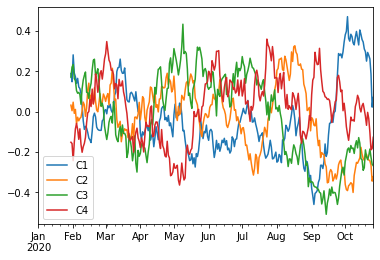

In [15]:
df.rolling(30).mean().plot()

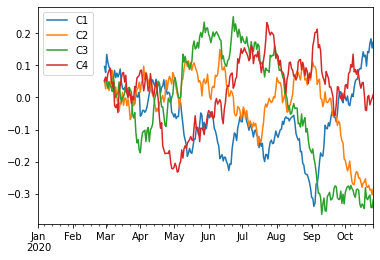

In [16]:
df.rolling(60).mean().plot()

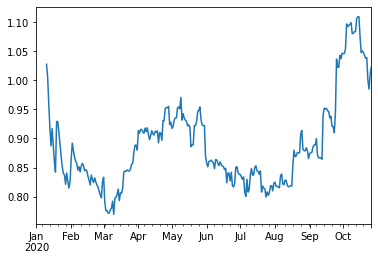

In [17]:
df.C1.rolling(60, min_periods=10).std().plot()

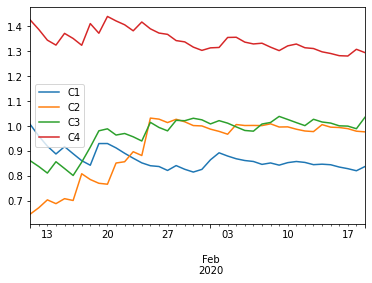

In [19]:
df.rolling(60, min_periods=10).std()[10:50].plot()

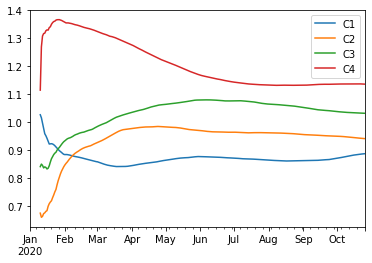

In [20]:
df.rolling(60, min_periods=10).std().expanding().mean().plot()

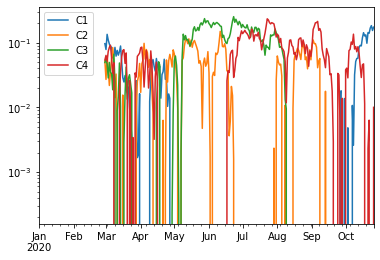

In [21]:
df.rolling(60).mean().plot(logy=True)

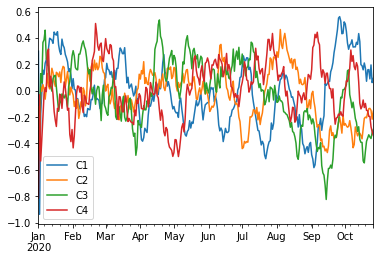

In [22]:
df.rolling('20D').mean().plot()

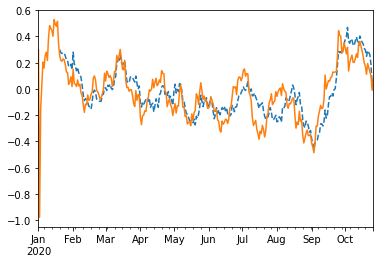

In [26]:
df.C1.rolling(30, min_periods=20).mean().plot(style='--', label='Simple MA')
df.C1.ewm(span=30).mean().plot(style='-', label='EWMA')

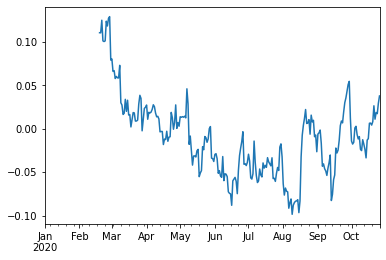

In [27]:
df.C1.rolling(100, min_periods=50).corr(df.C3).plot()

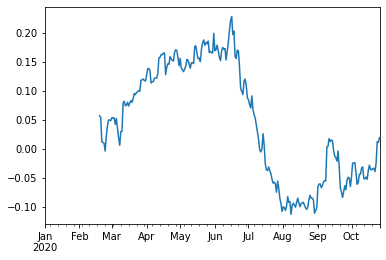

In [28]:
df.C2.rolling(100, min_periods=50).corr(df.C4).plot()

## 데이터 읽기 및 저장

|함수|설명|
|--|--|
|read_csv|파일, URL, 객체로부터 구분된 데이터 읽기(기본 구분자:',')|
|read_table|파일, URL, 객체로부터 구분된 데이터 읽기(기본 구분자:'\t')|
|read_fwf|고정폭 컬럼 형식에서 데이터 읽기(구분자 없는 데이터)|
|read_clipboard|클립보드에 있는 데이터 읽기. 웹페이지에 있는 표를 읽어올 때 유용|
|read_excel|엑셀 파일(xls, xlsx)에서 표 형식 데이터 읽기|
|read_hdf|Pandas에서 저장한 HDFS 파일의 데이터 읽기|
|read_html|HTML문서 내의 모든 테이블 데이터 읽기|
|read_json|JSON에서 데이터 읽기|
|read_msgpack|메시지팩 바이너리 포맷으로 인코딩된 pandas 데이터 읽기|
|read_pickle|파이썬 피클 포맷으로 저장된 객체 읽기|
|read_sas|SAS시스템의 사용자 정의 저장 포맷 데이터 읽기|
|read_sql|SQL 질의 결과를 DataFrame 형식으로 읽기|
|read_stata|Stata 파일에서 데이터 읽기|
|read_feather|Feather 바이너리 파일 포맷의 데이터 읽기|

### 텍스트 파일 읽기/쓰기

In [40]:
%%writefile example1.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example1.csv


In [41]:
!ls

example1.csv  example.json  output.json  ts.csv
example6.csv  output.csv    sample_data


In [42]:
pd.read_csv('example1.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [43]:
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example2.csv


In [44]:
pd.read_csv('example2.csv', header=None)

,0,1,2,3,4,5
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [45]:
pd.read_csv('example2.csv', names=['a', 'b', 'c', 'd', 'e', 'text'])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [46]:
pd.read_csv('example2.csv', names=['a', 'b', 'c', 'd', 'e', 'text'], index_col='text')

,a,b,c,d,e
text,,,,,
hi,1,2,3,4,5
pandas,6,7,8,9,10
csv,11,12,13,14,15


In [47]:
%%writefile example3.txt
     a     b     c
1   0.1   0.2   0.3
2   0.4   0.5   0.6
3   0.7   0.8   0.9

Writing example3.txt


In [48]:
pd.read_table('example3.txt', sep='\s+')

,a,b,c
1,0.1,0.2,0.3
2,0.4,0.5,0.6
3,0.7,0.8,0.9


In [49]:
%%writefile example4.csv
#파일 설명
a, b, c, d, e, text
# 컬럼은 a, b, c, d, e와 text가 있음
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example4.csv


In [50]:
pd.read_csv('example4.csv', skiprows=[0, 2])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [51]:
%%writefile example5.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NA, 10, pandas
11, NA, 13, 14, 15, csv

Writing example5.csv


In [52]:
pd.read_csv('example5.csv')

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NA,10,pandas
2,11,NA,13,14,15,csv


In [53]:
%%writefile example6.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NA, 10, pandas
11, NA, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NA, 10, pandas
11, NA, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NA, 10, pandas
11, NA, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NA, 10, pandas
11, NA, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NA, 10, pandas
11, NA, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NA, 10, pandas
11, NA, 13, 14, 15, csv

Overwriting example6.csv


In [54]:
pd.read_csv('example6.csv', nrows=5)

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NA,10,pandas
2,11,NA,13,14,15,csv
3,a,b,c,d,e,text
4,1,2,NA,4,5,hi


In [55]:
df = pd.read_csv('example6.csv')
df

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NA,10,pandas
2,11,NA,13,14,15,csv
3,a,b,c,d,e,text
4,1,2,NA,4,5,hi
5,6,7,8,NA,10,pandas
6,11,NA,13,14,15,csv
7,a,b,c,d,e,text
8,1,2,NA,4,5,hi
9,6,7,8,NA,10,pandas


In [56]:
df.to_csv('output.csv')

In [57]:
!cat output.csv

,a, b, c, d, e, text
0,1, 2, NA, 4, 5, hi
1,6, 7, 8, NA, 10, pandas
2,11, NA, 13, 14, 15, csv
3,a, b, c, d, e, text
4,1, 2, NA, 4, 5, hi
5,6, 7, 8, NA, 10, pandas
6,11, NA, 13, 14, 15, csv
7,a, b, c, d, e, text
8,1, 2, NA, 4, 5, hi
9,6, 7, 8, NA, 10, pandas
10,11, NA, 13, 14, 15, csv
11,a, b, c, d, e, text
12,1, 2, NA, 4, 5, hi
13,6, 7, 8, NA, 10, pandas
14,11, NA, 13, 14, 15, csv
15,a, b, c, d, e, text
16,1, 2, NA, 4, 5, hi
17,6, 7, 8, NA, 10, pandas
18,11, NA, 13, 14, 15, csv
19,a, b, c, d, e, text
20,1, 2, NA, 4, 5, hi
21,6, 7, 8, NA, 10, pandas
22,11, NA, 13, 14, 15, csv


In [58]:
dr = pd.date_range('2020-01-01', periods=10)
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int64

In [59]:
ts.to_csv('ts.csv', header=['value'])

In [60]:
!cat ts.csv

,value
2020-01-01,0
2020-01-02,1
2020-01-03,2
2020-01-04,3
2020-01-05,4
2020-01-06,5
2020-01-07,6
2020-01-08,7
2020-01-09,8
2020-01-10,9


In [61]:
%%writefile example.json
[{"a": 1, "b":2, "c":3, "d":4, :"e":5},
{"a": 6, "b":7, "c":8, "d":9, :"e":10},
{"a": 11, "b":12, "c":13, "d":14, :"e":15}]

Overwriting example.json


In [62]:
!cat example.json

[{"a": 1, "b":2, "c":3, "d":4, :"e":5},
{"a": 6, "b":7, "c":8, "d":9, :"e":10},
{"a": 11, "b":12, "c":13, "d":14, :"e":15}]


In [63]:
pd.read_json('example.json')

ValueError: ignored

In [64]:
ts.to_json('output.json')

In [65]:
!cat output.json

{"1577836800000":0,"1577923200000":1,"1578009600000":2,"1578096000000":3,"1578182400000":4,"1578268800000":5,"1578355200000":6,"1578441600000":7,"1578528000000":8,"1578614400000":9}

In [66]:
df.to_json('output.json')

In [67]:
!cat output.json

{"a":{"0":"1","1":"6","2":"11","3":"a","4":"1","5":"6","6":"11","7":"a","8":"1","9":"6","10":"11","11":"a","12":"1","13":"6","14":"11","15":"a","16":"1","17":"6","18":"11","19":"a","20":"1","21":"6","22":"11"}," b":{"0":" 2","1":" 7","2":" NA","3":" b","4":" 2","5":" 7","6":" NA","7":" b","8":" 2","9":" 7","10":" NA","11":" b","12":" 2","13":" 7","14":" NA","15":" b","16":" 2","17":" 7","18":" NA","19":" b","20":" 2","21":" 7","22":" NA"}," c":{"0":" NA","1":" 8","2":" 13","3":" c","4":" NA","5":" 8","6":" 13","7":" c","8":" NA","9":" 8","10":" 13","11":" c","12":" NA","13":" 8","14":" 13","15":" c","16":" NA","17":" 8","18":" 13","19":" c","20":" NA","21":" 8","22":" 13"}," d":{"0":" 4","1":" NA","2":" 14","3":" d","4":" 4","5":" NA","6":" 14","7":" d","8":" 4","9":" NA","10":" 14","11":" d","12":" 4","13":" NA","14":" 14","15":" d","16":" 4","17":" NA","18":" 14","19":" d","20":" 4","21":" NA","22":" 14"}," e":{"0":" 5","1":" 10","2":" 15","3":" e","4":" 5","5":" 10","6":" 15","7":" 

### 이진 데이터 파일 읽기/쓰기

In [68]:
df = pd.read_csv('example1.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [69]:
df.to_pickle('df_pickle')
pd.read_pickle('df_pickle')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [70]:
df = pd.DataFrame({'a' : np.random.randn(100),
                   'b' : np.random.randn(100),
                   'c' : np.random.randn(100)})
df

,a,b,c
0,-1.040531,-0.741627,0.908932
1,0.097539,-0.244339,0.381024
2,-1.232157,-1.361540,-0.076884
3,0.586312,1.481025,0.046209
4,2.005228,0.286767,0.641983
...,...,...,...
95,-0.857066,0.742251,-0.442479
96,-0.353171,0.269439,0.561180
97,-0.220311,-2.055366,0.413535
98,0.480112,-0.149092,1.114429


In [71]:
h = pd.HDFStore('data.h5')
h['obj1'] = df
h['obj1_col1'] = df['a']
h['obj1_col2'] = df['b']
h['obj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: data.h5

In [72]:
h['obj1']

,a,b,c
0,-1.040531,-0.741627,0.908932
1,0.097539,-0.244339,0.381024
2,-1.232157,-1.361540,-0.076884
3,0.586312,1.481025,0.046209
4,2.005228,0.286767,0.641983
...,...,...,...
95,-0.857066,0.742251,-0.442479
96,-0.353171,0.269439,0.561180
97,-0.220311,-2.055366,0.413535
98,0.480112,-0.149092,1.114429


In [73]:
h.put('obj2', df, format='table')

In [74]:
h.select('obj2', where=['index > 50 and index <= 60'])

,a,b,c
51,-0.418169,-0.538522,0.416996
52,-0.082571,1.179887,-1.248439
53,-0.972309,-0.888641,0.266906
54,-0.976845,0.022320,0.562055
55,-0.539804,0.370433,-0.018314
56,1.594007,-1.799297,1.056175
57,0.375419,0.898883,-1.059735
58,0.344686,0.851537,-1.939981
59,-0.790553,0.182689,-0.117153
60,1.282034,0.587277,0.113632


In [75]:
h.close()

In [76]:
df.to_hdf('data.h5', 'obj3', format='table')

In [78]:
pd.read_hdf('data.h5', 'obj3', where=['index < 10'])

,a,b,c
0,-1.040531,-0.741627,0.908932
1,0.097539,-0.244339,0.381024
2,-1.232157,-1.361540,-0.076884
3,0.586312,1.481025,0.046209
4,2.005228,0.286767,0.641983
5,1.456252,-0.927888,-1.278731
6,-1.312034,0.943393,-0.222857
7,-1.352686,-0.508776,0.523227
8,0.638304,0.588711,1.155138
9,0.391264,2.064215,-0.013213


In [79]:
df.to_excel('example.xlsx', 'Sheet1')

In [80]:
!ls

data.h5       example2.csv  example5.csv  example.xlsx	sample_data
df_pickle     example3.txt  example6.csv  output.csv	ts.csv
example1.csv  example4.csv  example.json  output.json


In [81]:
pd.read_excel('example.xlsx', 'Sheet1')

,Unnamed: 0,a,b,c
0,0,-1.040531,-0.741627,0.908932
1,1,0.097539,-0.244339,0.381024
2,2,-1.232157,-1.361540,-0.076884
3,3,0.586312,1.481025,0.046209
4,4,2.005228,0.286767,0.641983
...,...,...,...,...
95,95,-0.857066,0.742251,-0.442479
96,96,-0.353171,0.269439,0.561180
97,97,-0.220311,-2.055366,0.413535
98,98,0.480112,-0.149092,1.114429


## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

In [82]:
a = np.array([1,2,None,4,5])
a

array([1, 2, None, 4, 5], dtype=object)

In [83]:
a.sum()

TypeError: ignored

#### NaN: 누락된 수치 데이터

In [84]:
a = np.array([1,2,np.nan,4,5])
a.dtype

dtype('float64')

In [85]:
0 + np.nan

nan

In [86]:
np.nan + np.nan

nan

In [87]:
a.sum(), a.min(), a.max()

(nan, nan, nan)

In [88]:
np.nansum(a), np.nanmin(a), np.nanmax(a)

(12.0, 1.0, 5.0)

In [89]:
pd.Series([1,2,np.nan,4,None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [91]:
s = pd.Series(range(5), dtype=int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [92]:
s[0] = None
s

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [93]:
s[3] = np.nan

In [95]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

#### Null 값 처리

|인자|설명|
|--|--|
|isnull()|누락되거나 NA인 값을 불리언 값으로 반환|
|notnull()|isnull()의 반대|
|dropna()|누락된 데이터가 있는 축 제외|
|fillna()|누락된 값을 대체하거나 ffill이나 bfill로 보간 메소드 적용|

In [96]:
s = pd.Series([1,2,np.nan,'String', None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [97]:
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [98]:
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [99]:
s.dropna()

0         1
1         2
3    String
dtype: object

In [100]:
df.dropna(axis='columns')

,a,b,c
0,-1.040531,-0.741627,0.908932
1,0.097539,-0.244339,0.381024
2,-1.232157,-1.361540,-0.076884
3,0.586312,1.481025,0.046209
4,2.005228,0.286767,0.641983
...,...,...,...
95,-0.857066,0.742251,-0.442479
96,-0.353171,0.269439,0.561180
97,-0.220311,-2.055366,0.413535
98,0.480112,-0.149092,1.114429


In [101]:
df[3] = np.nan
df

,a,b,c,3
0,-1.040531,-0.741627,0.908932,NaN
1,0.097539,-0.244339,0.381024,NaN
2,-1.232157,-1.361540,-0.076884,NaN
3,0.586312,1.481025,0.046209,NaN
4,2.005228,0.286767,0.641983,NaN
...,...,...,...,...
95,-0.857066,0.742251,-0.442479,NaN
96,-0.353171,0.269439,0.561180,NaN
97,-0.220311,-2.055366,0.413535,NaN
98,0.480112,-0.149092,1.114429,NaN


In [102]:
df.dropna(axis = 'columns', how='all')

,a,b,c
0,-1.040531,-0.741627,0.908932
1,0.097539,-0.244339,0.381024
2,-1.232157,-1.361540,-0.076884
3,0.586312,1.481025,0.046209
4,2.005228,0.286767,0.641983
...,...,...,...
95,-0.857066,0.742251,-0.442479
96,-0.353171,0.269439,0.561180
97,-0.220311,-2.055366,0.413535
98,0.480112,-0.149092,1.114429


In [104]:
df.dropna(axis = 'rows', thresh=3)

,a,b,c,3
0,-1.040531,-0.741627,0.908932,NaN
1,0.097539,-0.244339,0.381024,NaN
2,-1.232157,-1.361540,-0.076884,NaN
3,0.586312,1.481025,0.046209,NaN
4,2.005228,0.286767,0.641983,NaN
...,...,...,...,...
95,-0.857066,0.742251,-0.442479,NaN
96,-0.353171,0.269439,0.561180,NaN
97,-0.220311,-2.055366,0.413535,NaN
98,0.480112,-0.149092,1.114429,NaN


In [105]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [106]:
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [107]:
s.fillna(method='ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [108]:
s.fillna(method='bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [109]:
df

,a,b,c,3
0,-1.040531,-0.741627,0.908932,NaN
1,0.097539,-0.244339,0.381024,NaN
2,-1.232157,-1.361540,-0.076884,NaN
3,0.586312,1.481025,0.046209,NaN
4,2.005228,0.286767,0.641983,NaN
...,...,...,...,...
95,-0.857066,0.742251,-0.442479,NaN
96,-0.353171,0.269439,0.561180,NaN
97,-0.220311,-2.055366,0.413535,NaN
98,0.480112,-0.149092,1.114429,NaN


In [110]:
df.fillna(method='ffill', axis=0)

,a,b,c,3
0,-1.040531,-0.741627,0.908932,NaN
1,0.097539,-0.244339,0.381024,NaN
2,-1.232157,-1.361540,-0.076884,NaN
3,0.586312,1.481025,0.046209,NaN
4,2.005228,0.286767,0.641983,NaN
...,...,...,...,...
95,-0.857066,0.742251,-0.442479,NaN
96,-0.353171,0.269439,0.561180,NaN
97,-0.220311,-2.055366,0.413535,NaN
98,0.480112,-0.149092,1.114429,NaN


In [111]:
df.fillna(method='ffill', axis=1)

,a,b,c,3
0,-1.040531,-0.741627,0.908932,0.908932
1,0.097539,-0.244339,0.381024,0.381024
2,-1.232157,-1.361540,-0.076884,-0.076884
3,0.586312,1.481025,0.046209,0.046209
4,2.005228,0.286767,0.641983,0.641983
...,...,...,...,...
95,-0.857066,0.742251,-0.442479,-0.442479
96,-0.353171,0.269439,0.561180,0.561180
97,-0.220311,-2.055366,0.413535,0.413535
98,0.480112,-0.149092,1.114429,1.114429


In [112]:
df.fillna(method='bfill', axis=0)

,a,b,c,3
0,-1.040531,-0.741627,0.908932,NaN
1,0.097539,-0.244339,0.381024,NaN
2,-1.232157,-1.361540,-0.076884,NaN
3,0.586312,1.481025,0.046209,NaN
4,2.005228,0.286767,0.641983,NaN
...,...,...,...,...
95,-0.857066,0.742251,-0.442479,NaN
96,-0.353171,0.269439,0.561180,NaN
97,-0.220311,-2.055366,0.413535,NaN
98,0.480112,-0.149092,1.114429,NaN


In [113]:
df.fillna(method='bfill', axis=1)

,a,b,c,3
0,-1.040531,-0.741627,0.908932,NaN
1,0.097539,-0.244339,0.381024,NaN
2,-1.232157,-1.361540,-0.076884,NaN
3,0.586312,1.481025,0.046209,NaN
4,2.005228,0.286767,0.641983,NaN
...,...,...,...,...
95,-0.857066,0.742251,-0.442479,NaN
96,-0.353171,0.269439,0.561180,NaN
97,-0.220311,-2.055366,0.413535,NaN
98,0.480112,-0.149092,1.114429,NaN


### 중복 제거

In [115]:
df = pd.DataFrame({'c1' : ['a', 'b', 'c'] * 2 + ['b'] + ['c'],
                   'c2' : [1, 2, 1, 1, 2, 3, 3, 4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [116]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [118]:
df.drop_duplicates()

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환

In [119]:
s = pd.Series([1.,2.,-999.,3.,-1000.,4.])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [121]:
s.replcace(-999, np.nan)

AttributeError: ignored

In [122]:
s.replace([-999, -1000], np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [123]:
s.replace([-999, -1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    3.0
4    0.0
5    4.0
dtype: float64

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly